<a href="https://colab.research.google.com/github/yuukun123/Python/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# T√πy ch·ªânh ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu ƒë·ªì ƒë·∫πp h∆°n
sns.set(style="whitegrid")

Mounted at /content/drive


In [ ]:
# ƒê∆∞·ªùng d·∫´n file
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DelawarePainDatabase_SecondaryDatabase_FaceGenCharacterization.xlsx"
xls = pd.ExcelFile(file_path)

# **clean DelawarePainDatabase_SecondaryDatabase_FaceGenCharacterization.xlsx**

h√†m l·ªçc d·ªØ li·ªáu sheet ExpressionAverage


In [ ]:
# def clean_expression_sheet(df, required_cols=["Expression"]):
#     # X√≥a c·ªôt kh√¥ng t√™n
#     df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

#     # X√≥a d√≤ng thi·∫øu c·ªôt b·∫Øt bu·ªôc
#     df = df.dropna(subset=required_cols)

#     # Lo·∫°i b·ªè c√°c bi·ªÉu c·∫£m kh√¥ng d√πng
#     df = df[~df["Expression"].str.lower().str.contains("pms13")]
#     df = df[~df["Expression"].str.lower().str.contains("facegenpro_avgblackface")]

#     # C√°c c·ªôt c·∫ßn √©p ki·ªÉu v√† x·ª≠ l√Ω NaN
#     numeric_cols = ["ThreatRating", "ConfusionRating", "ThreatComp", "ConfusionComp"]
#     for col in numeric_cols:
#         if col in df.columns:
#             df[col] = df[col].replace([".", ""], np.nan)
#             df[col] = pd.to_numeric(df[col], errors="coerce")
#             df[col] = df[col].fillna(df[col].mean())

#     # Lo·∫°i b·ªè c√°c d√≤ng li√™n quan face gen pro
#     df = df[~df["Norming Survey"].str.lower().str.contains("facegenpro")]

#     df = df.infer_objects(copy=False)

#     return df


In [ ]:
def clean_expression_sheet(df, required_cols=["Expression"]):
  # X√≥a c·ªôt kh√¥ng t√™n
  df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

  # X√≥a d√≤ng thi·∫øu c·ªôt b·∫Øt bu·ªôc
  df = df.dropna(subset=required_cols)

  # Lo·∫°i b·ªè c√°c bi·ªÉu c·∫£m kh√¥ng d√πng
  df = df[~df["Expression"].str.lower().str.contains("pms13")]
  df = df[~df["Expression"].str.lower().str.contains("facegenpro_avgblackface")]

  # ‚úÖ Lo·∫°i b·ªè c√°c d√≤ng li√™n quan face gen pro TR∆Ø·ªöC ƒë·ªÉ kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn mean
  df = df[~df["Norming Survey"].str.lower().str.contains("facegenpro")]

  # C√°c c·ªôt c·∫ßn √©p ki·ªÉu v√† x·ª≠ l√Ω NaN
  numeric_cols = ["ThreatRating", "ConfusionRating", "ThreatComp", "ConfusionComp"]
  for col in numeric_cols:
      if col in df.columns:
          df[col] = df[col].replace([".", ""], np.nan)
          df[col] = pd.to_numeric(df[col], errors="coerce")
          df[col] = df[col].fillna(df[col].mean())

  df = df.loc[:, ~df.columns.str.contains("ConfusionRating")]
  df = df.loc[:, ~df.columns.str.contains("ConfusionComp")]

  df = df.infer_objects(copy=False)
  return df


ExpressionAverages

In [ ]:
df_expr = pd.read_excel(xls, sheet_name="ExpressionAverages")
# print(df_expr.dtypes)
df_expr = clean_expression_sheet(df_expr)

print(df_expr.to_string())

   Expression Norming Survey  PainRating  FearRating  AngerRating  DisgustRating  HappinessRating  SadnessRating  SurpriseRating  ThreatRating      FearComp     AngerComp   DisgustComp  HappinessComp   SadnessComp  SurpriseComp    ThreatComp
0         AJ2      FirstPass    5.052632    2.894737     2.078947       2.421053         1.210526       3.131579        2.131579      1.736842  2.033766e-06  9.570970e-08  3.064130e-07   1.954638e-12  1.372440e-04  6.551333e-07  3.610371e-09
3         AK5      FirstPass    4.650000    2.225000     2.725000       2.575000         1.275000       2.275000        1.725000      2.375000  7.102722e-09  4.114614e-05  2.849266e-06   6.427339e-13  3.038153e-08  1.352565e-10  1.223136e-07
6         EF5      FirstPass    5.837838    2.594595     4.378378       3.162162         1.324324       1.864865        2.378378      3.351351  1.203900e-09  3.054509e-03  2.977539e-07   2.203910e-15  3.098174e-13  5.076302e-11  6.699533e-06
9         KM4      FirstPass    

<ipython-input-18-63b2d55437d4>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace([".", ""], np.nan)


h√†m l·ªçc d·ªØ li·ªáu sheet slider_face_gen

In [ ]:
import numpy as np
import pandas as pd

def clean_slider_facegen_sheet(df):
    # X√≥a c√°c c·ªôt kh√¥ng t√™n
    df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

    # Lo·∫°i b·ªè c·ªôt 'PMS13' n·∫øu c√≥
    if "PMS13" in df.columns:
        df = df.drop(columns=["PMS13"])

    # L∆∞u l·∫°i danh s√°ch Slider g·ªëc
    slider_labels = df["Slider"].values

    # X·ª≠ l√Ω c√°c c·ªôt s·ªë
    numeric_cols = df.columns.drop("Slider")
    for col in numeric_cols:
        df[col] = df[col].replace([".", ""], np.nan)
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = df[col].fillna(df[col].mean())

    df = df.infer_objects(copy=False)

    # B√¢y gi·ªù transpose
    df = df.set_index("Slider").transpose()

    # Sau khi transpose:
    # Reset index ƒë·ªÉ 'Slider' th√†nh 1 c·ªôt
    df.reset_index(inplace=True)

    # ƒê·ªïi t√™n c·ªôt ƒë·∫ßu ti√™n th√†nh 'Slider'
    df = df.rename(columns={"index": "Slider"})

    # >>> TH√äM B∆Ø·ªöC T·∫†O ExpressionKey <<<
    df["ExpressionKey"] = df["Slider"].astype(str).str.strip().str.upper()

    return df


Slider_face_gen

In [ ]:
df_slider_mo = pd.read_excel(xls, sheet_name="Sliders_FaceGenModeller")
# print(df_slider_mo.dtypes)
df_slider_mo = clean_slider_facegen_sheet(df_slider_mo)
print(df_slider_mo.to_string())

Slider Slider    Anger   Disgust      Fear   Sad  SmileClosed  SmileOpen  Surprise  BlinkLeft  BlinkRIght  BrowDownLeft  BrowDownRight  BrowInLeft  BrownInRight  BrowUpLeft  BrowUpRight   EarsOut  EpicanthicFold  EyeSquintLeft  EyeSquintRight  LookDown  LookLeft  LookRight    LookUp       aah     B,M,P   big aah   ch,J,sh     D,S,T        ee        eh       F,V         i         K         N        oh     ooh,Q         R        th         W ExpressionKey
0         AK5  0.22000  0.480000  0.551818  0.83     0.551818   0.551818  0.551818   0.560000    0.570000      1.000000       1.000000    0.551818      0.551818    0.551818     0.551818  0.551818        0.630000       0.551818        0.551818  0.551818  0.551818   0.551818  0.551818  0.090000  0.551818  0.551818  0.500000  0.551818  0.551818  0.551818  0.551818  0.551818  0.551818  0.551818  0.190000  0.551818  0.551818  0.551818  0.551818           AK5
1         AJ2  0.43800  0.210000  1.000000  1.00     0.438000   0.800000  0.438000  

<ipython-input-70-b690d0cf75c9>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace([".", ""], np.nan)


h√†m l·ªçc first_pass_norming

In [ ]:
# def clean_first_pass_norming(df):
#     import pandas as pd


#     # 1. Lo·∫°i c·ªôt ch·ª©a 'pms13'
#     df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

#     # 2. Lo·∫°i b·ªè c√°c c·ªôt nh√¢n kh·∫©u h·ªçc kh√¥ng c·∫ßn thi·∫øt
#     drop_cols = ['Race', 'SexualOrient', 'Political']
#     df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

#     # 3. T√¨m c√°c c·ªôt ƒë√°nh gi√° c·∫£m x√∫c
#     rating_cols = [c for c in df.columns if "emotion" in c.lower()]

#     # 4. T√≠nh t·ª∑ l·ªá thi·∫øu
#     miss_ratios = df[rating_cols].isna().mean()

#     # 5. Gi·ªØ l·∫°i c√°c c·ªôt c√≥ missing <= 0.4
#     keep_cols = miss_ratios[miss_ratios <= 0.4].index.tolist()
#     df = df[keep_cols + [col for col in df.columns if col not in rating_cols]]

#     # 6. Ph√¢n lo·∫°i c·ªôt theo m·ª©c ƒë·ªô thi·∫øu
#     small_missing = miss_ratios[miss_ratios < 0.05].index.tolist()
#     large_missing = miss_ratios[(miss_ratios >= 0.05) & (miss_ratios <= 0.4)].index.tolist()

#     # 7. Drop d√≤ng ch·ª©a missing < 5%
#     df = df.dropna(subset=small_missing)

#     # 8. ƒêi·ªÅn missing >= 5% b·∫±ng mode
#     for col in large_missing:
#         mode_val = df[col].mode().iat[0]
#         df[col] = df[col].fillna(mode_val).astype(int)

#     # 9. Reshape wide ‚Üí long format
#     id_vars = ['ResponseId', 'Age', 'Gender']
#     id_vars = [col for col in id_vars if col in df.columns]

#     long_df = df.melt(
#         id_vars=id_vars,
#         value_vars=keep_cols,
#         var_name="Item",
#         value_name="Rating"
#     )

#     # 10. T√°ch th√¥ng tin t·ª´ t√™n c·ªôt: ImageID, EmotionType, QuestionNumber
#     long_df[['ImageID', 'EmotionType', 'QuestionNum']] = long_df['Item'].str.extract(r'([A-Za-z0-9_]+)_([a-zA-Z0-9]+)_([0-9]+)')

#     # 11. X·ª≠ l√Ω ki·ªÉu d·ªØ li·ªáu
#     long_df['Rating'] = pd.to_numeric(long_df['Rating'], errors='coerce')
#     long_df['QuestionNum'] = pd.to_numeric(long_df['QuestionNum'], errors='coerce')

#     return long_df


In [ ]:
# def clean_first_pass_norming(df):
#     # 1. Lo·∫°i b·ªè c√°c c·ªôt ch·ª©a 'pms13'
#     df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

#     # 2. B·ªè d√≤ng ƒë·∫ßu ti√™n (header m√¥ t·∫£)
#     df = df.drop(index=0).reset_index(drop=True)

#     # 3. T√¨m c√°c c·ªôt c·∫£m x√∫c
#     emotion_cols = [col for col in df.columns if "_emotion_" in col]

#     # 4. Chu·∫©n b·ªã metadata: Age, Gender
#     df_meta = df[['ResponseId', 'Age', 'Gender']].copy()

#     df_meta['Age'] = pd.to_numeric(df_meta['Age'], errors='coerce')
#     df_meta['Gender'] = df_meta['Gender'].str.strip().str.lower()

#     # ‚úÖ Chu·∫©n h√≥a Gender: female = 0, male = 1
#     gender_map = {'female': 0, 'male': 1}
#     df_meta['Gender'] = df_meta['Gender'].map(gender_map)

#     # ‚úÖ X√≥a c√°c d√≤ng Gender kh√¥ng h·ª£p l·ªá (NaN)
#     df_meta = df_meta.dropna(subset=['Gender'])

#     # 5. Chuy·ªÉn v·ªÅ d·∫°ng long format
#     df_long = df.melt(id_vars=['ResponseId'], value_vars=emotion_cols,
#                       var_name='Image_ID', value_name='Emotion')

#     # 6. B·ªè c√°c d√≤ng kh√¥ng c√≥ nh√£n
#     df_long.dropna(subset=['Emotion'], inplace=True)

#     # 7. Tr√≠ch t√™n file ·∫£nh t·ª´ t√™n c·ªôt
#     df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'([A-Za-z0-9]+)_emotion_\d+')[0]
#     df_long['ImageFile'] = df_long['ExpressionKey'] + ".jpg"

#     # ‚úÖ 7.5. L·ªçc c√°c ·∫£nh c√≥ ExpressionKey h·ª£p l·ªá
#     valid_expressions = ["AJ2", "AK5", "EF5", "KM4", "KM4b", "PMS5", "PMS7", "PMS14"]
#     df_long = df_long[df_long['ExpressionKey'].isin(valid_expressions)]

#     # 8. ƒê·ªïi ki·ªÉu nh√£n c·∫£m x√∫c sang s·ªë
#     df_long['Emotion'] = df_long['Emotion'].astype(int)

#     # 9. Merge th√™m Age v√† Gender
#     df_long = df_long.merge(df_meta, on='ResponseId', how='inner')

#     return df_long


In [ ]:
def clean_first_pass_norming(df):
    # 1. Lo·∫°i b·ªè c√°c c·ªôt ch·ª©a 'pms13'
    df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

    # 2. B·ªè d√≤ng ƒë·∫ßu ti√™n (header m√¥ t·∫£)
    df = df.drop(index=0).reset_index(drop=True)

    # 3. T√¨m c√°c c·ªôt c·∫£m x√∫c
    emotion_cols = [col for col in df.columns if "_emotion_" in col]

    # 4. Chu·∫©n b·ªã metadata: Age, Gender
    df_meta = df[['ResponseId', 'Age', 'Gender']].copy()

    df_meta['Age'] = pd.to_numeric(df_meta['Age'], errors='coerce')
    df_meta['Gender'] = df_meta['Gender'].str.strip().str.lower()

    # ‚úÖ S·ª≠a 'm' th√†nh 'male' tr∆∞·ªõc khi map
    df_meta['Gender'] = df_meta['Gender'].replace({'m': 'male'})

    # ‚úÖ Chu·∫©n h√≥a Gender: female = 0, male = 1
    gender_map = {'female': 0, 'male': 1}
    df_meta['Gender'] = df_meta['Gender'].map(gender_map)

    # ‚úÖ X√≥a c√°c d√≤ng Gender kh√¥ng h·ª£p l·ªá (NaN)
    df_meta = df_meta.dropna(subset=['Gender'])

    # 5. Chuy·ªÉn v·ªÅ d·∫°ng long format
    df_long = df.melt(id_vars=['ResponseId'], value_vars=emotion_cols,
                      var_name='Image_ID', value_name='Emotion')

    # 6. B·ªè c√°c d√≤ng kh√¥ng c√≥ nh√£n
    df_long.dropna(subset=['Emotion'], inplace=True)

    # 7. Tr√≠ch t√™n file ·∫£nh t·ª´ t√™n c·ªôt
    df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'([A-Za-z0-9]+)_emotion_\d+')[0]
    df_long['ImageFile'] = df_long['ExpressionKey'] + ".jpg"

    # ‚úÖ 7.5. L·ªçc c√°c ·∫£nh c√≥ ExpressionKey h·ª£p l·ªá
    valid_expressions = ["AJ2", "AK5", "EF5", "KM4", "KM4b", "PMS5", "PMS7", "PMS14"]
    df_long = df_long[df_long['ExpressionKey'].isin(valid_expressions)]

    # 8. ƒê·ªïi ki·ªÉu nh√£n c·∫£m x√∫c sang s·ªë
    df_long['Emotion'] = df_long['Emotion'].astype(int)

    # 9. Merge th√™m Age v√† Gender
    df_long = df_long.merge(df_meta, on='ResponseId', how='inner')

    return df_long


Fist_pass_norming

In [ ]:
df_first = pd.read_excel(xls, sheet_name="FirstPassNorming")
df_first = clean_first_pass_norming(df_first)


print(df_first.to_string())
# df_first.info()
# df_first.head()


             ResponseId          Image_ID  Emotion ExpressionKey  ImageFile  Age  Gender
0     R_2zw5psM5CtFQKno    EF5_emotion_18        4           EF5    EF5.jpg   26     1.0
1     R_2Ua2Dc353v4cNGn    EF5_emotion_18        2           EF5    EF5.jpg   32     0.0
2     R_2YR34dGGiKYFi2y    EF5_emotion_18        7           EF5    EF5.jpg   64     0.0
3     R_BWYpKelNH9C8aRj    EF5_emotion_18        1           EF5    EF5.jpg   24     1.0
4     R_2an0MfrT5MWzwiQ    EF5_emotion_18        7           EF5    EF5.jpg   45     0.0
5     R_3PGE13wEeq6tIOT    EF5_emotion_18        1           EF5    EF5.jpg   21     1.0
6     R_1lzUZmKRQVzOpxD    EF5_emotion_18        6           EF5    EF5.jpg   39     1.0
7     R_31uzrii0srEgLi3    EF5_emotion_18        1           EF5    EF5.jpg   59     0.0
8     R_27U5GunQGBeN6FX    EF5_emotion_18        1           EF5    EF5.jpg   31     0.0
9     R_3oYotaD13IZxRGi    EF5_emotion_18        1           EF5    EF5.jpg   25     1.0
10    R_2B4ImrFXFEt8L

h√†m l·ªçc demographics

In [ ]:
def clean_demographics(df):
    # 0. Gi·ªØ l·∫°i hai c·ªôt ƒë·∫ßu ti√™n (gi·∫£ s·ª≠ l√† c·ªôt ch·ª©a Age v√† Gender)
    df = df.iloc[:, :2]

    # 1. ƒê·∫∑t t√™n c·ªôt
    df.columns = ['Age', 'Gender']  # ƒê·∫∑t t√™n c·ªôt l√† "Age" v√† "Gender"

    # 2. X√≥a d√≤ng ƒë·∫ßu ti√™n (Age, Gender)
    df = df.drop(index=0).reset_index(drop=True)

    # # 3. Chu·∫©n h√≥a c·ªôt Gender: Female -> 0, Male -> 1, c√°c gi√° tr·ªã kh√°c -> NaN
    # df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()
    # gender_map = {'female': 0, 'male': 1}
    # df['Gender'] = df['Gender'].map(gender_map).where(df['Gender'].isin(['female', 'male']), np.nan)

    return df

Demographics

In [ ]:
df_demographics = pd.read_excel(xls, sheet_name="Demographics")
df_demographics = clean_demographics(df_demographics)
print(df_demographics.to_string())


   Age   Gender
0   25   Female
1   26     Male
2   49  Female 
3   32   Female
4   64   Female
5   36   Female
6   49     Male
7   32   Female
8   25     Male
9   24     Male
10  45   Female
11  32   Female
12  21     Male
13  39     Male
14  59   Female
15  31   Female
16  39     Male
17  31     Male
18  39     Male
19  48   Female
20  25     Male
21  40   Female
22  24     Male
23  40   Female
24  27     Male
25  36     Male
26  26   Female
27  35     Male
28  36     Male
29  26     Male
30  37     Male
31  61     Male
32  48     Male
33  31   Female
34  36   Female
35  33   Female
36  21   Female
37  46     Male
38  46     Male
39  40     Male
40  28   Female
41  44     Male
42  51   Female
43  45   Female
44  49   Female
45  31     Male
46  36     Male
47  20   Female
48  43     Male
49  23     Male
50  44   Female
51  43   Female
52  52   Female
53  34     Male
54  75     Male
55  40   Female
56  39   Female
57  40   Female
58  61   Female
59  27   Female
60  49     Male
61  40  

In [ ]:
# Gi·∫£ s·ª≠ 4 DataFrame ƒë√£ t·ªìn t·∫°i: df_expr, df_slider_mo, df_first, df_demographics

# Ghi v√†o file Excel v·ªõi 4 sheet
with pd.ExcelWriter('/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx') as writer:
    df_expr.to_excel(writer, sheet_name='Expression', index=False)
    df_slider_mo.to_excel(writer, sheet_name='Slider_MO', index=False)
    df_first.to_excel(writer, sheet_name='First', index=False)
    df_demographics.to_excel(writer, sheet_name='Demographics', index=False)

print("save successful")


save successful


In [ ]:
# # ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c l∆∞u file CSV
# output_dir = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/'

# # L∆∞u t·ª´ng DataFrame v√†o file CSV ri√™ng
# df_expr.to_csv(output_dir + 'Expression.csv', index=False)
# df_slider_mo.to_csv(output_dir + 'Slider_MO.csv', index=False)
# df_first.to_csv(output_dir + 'First.csv', index=False)
# df_demographics.to_csv(output_dir + 'Demographics.csv', index=False)

In [ ]:
# # ƒê∆∞·ªùng d·∫´n t·ªõi file Excel nhi·ªÅu sheet
# xlsx_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"  # ho·∫∑c ƒë∆∞·ªùng d·∫´n ƒë·∫ßy ƒë·ªß n·∫øu c·∫ßn

# # ƒê·ªçc t·∫•t c·∫£ c√°c sheet v√†o dict
# all_sheets = pd.read_excel(xlsx_path, sheet_name=None)

# # G·ªôp t·∫•t c·∫£ sheet l·∫°i th√†nh m·ªôt DataFrame
# merged_df = pd.concat(all_sheets.values(), ignore_index=True)

# # L∆∞u ra Excel
# merged_df.to_excel("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_cleaned.xlsx", index=False)

# # L∆∞u ra CSV
# merged_df.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_cleaned.csv", index=False)

In [ ]:
# import pandas as pd

# # ƒê·ªçc file Excel
# file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"
# xls = pd.ExcelFile(file_path)

# # ƒê·ªçc c√°c sheet
# df_expression = xls.parse("Expression")
# df_slider = xls.parse("Slider_MO")
# df_first = xls.parse("First")
# df_demo = xls.parse("Demographics")

# # --- B∆∞·ªõc 1: Transpose Slider_MO ƒë·ªÉ ph√π h·ª£p v·ªõi Expression ---
# df_slider_t = df_slider.set_index('Slider').T.reset_index()
# df_slider_t = df_slider_t.rename(columns={'index': 'Expression'})

# # Merge v·ªõi Expression theo c·ªôt "Expression"
# df_merged_exp = pd.merge(df_expression, df_slider_t, on="Expression", how="left")

# # --- B∆∞·ªõc 2: G·ªôp Demographics v√†o First (gi·∫£ ƒë·ªãnh th·ª© t·ª± d√≤ng gi·ªëng nhau) ---
# df_first_demo = pd.concat([df_first.reset_index(drop=True), df_demo.reset_index(drop=True)], axis=1)

# # --- B∆∞·ªõc 3: Chu·∫©n h√≥a m√£ ·∫£nh t·ª´ ImageFile ƒë·ªÉ merge ---
# df_first_demo['ImageCode'] = df_first_demo['ImageFile'].str.extract(r'([A-Z]+\d+[a-zA-Z]?)')

# # Merge First + Demographics v·ªõi d·ªØ li·ªáu bi·ªÉu c·∫£m
# df_final = pd.merge(df_first_demo, df_merged_exp, left_on='ImageCode', right_on='Expression', how='left')

# # Xu·∫•t ho·∫∑c l∆∞u file n·∫øu c·∫ßn:
# # df_final.to_excel("merged_output.xlsx", index=False)

# # Hi·ªÉn th·ªã m·ªôt v√†i d√≤ng ƒë·ªÉ ki·ªÉm tra
# print(df_final.head())


In [ ]:
import numpy as np
import pandas as pd

# ƒê∆∞·ªùng d·∫´n t·ªõi file Excel
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"
xls = pd.ExcelFile(file_path)

# ƒê·ªçc c√°c sheet
df_first = pd.read_excel(xls, sheet_name="First")
df_expression = pd.read_excel(xls, sheet_name="Expression")
df_slider_mo = pd.read_excel(xls, sheet_name="Slider_MO")

# X·ª≠ l√Ω First
df_first['ExpressionKey'] = df_first['ImageFile'].str.replace('.jpg', '', regex=False)
df_first['ExpressionKey'] = df_first['ExpressionKey'].str.strip().str.upper()

# X·ª≠ l√Ω Expression
df_expression['Expression'] = df_expression['Expression'].astype(str).str.strip().str.upper()

# X·ª≠ l√Ω Slider_MO
df_slider_mo = df_slider_mo.loc[:, ~df_slider_mo.columns.str.contains("^Unnamed")]
if "PMS13" in df_slider_mo.columns:
    df_slider_mo = df_slider_mo.drop(columns=["PMS13"])

# Th√™m ExpressionKey d·ª±a tr√™n c·ªôt 'Slider'
df_slider_mo["ExpressionKey"] = df_slider_mo["Slider"].astype(str).str.strip().str.upper()

# Merge First + Expression
df_merged = df_first.merge(df_expression, left_on='ExpressionKey', right_on='Expression', how='left')

# Merge th√™m v·ªõi Slider_MO
df_merged = df_merged.merge(df_slider_mo, on='ExpressionKey', how='left')

# C√°c c·ªôt mong mu·ªën (c√°c c·ªôt First + Expression + t·∫•t c·∫£ c√°c c·ªôt t·ª´ Slider_MO)
cols_to_keep = [
    'ImageFile', 'Emotion',  # t·ª´ First
    'PainRating', 'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
] + list(df_slider_mo.columns.drop(['Slider', 'ExpressionKey']))

df_final = df_merged[cols_to_keep].dropna(subset=['PainRating'])

# In th·ª≠ k·∫øt qu·∫£
print(df_final.to_string())

# L∆∞u l·∫°i
df_final.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx'

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv")
df.corr()

ValueError: could not convert string to float: 'EF5.jpg'

# **d√πng torch**

In [ ]:
import os
import random
from sklearn.model_selection import train_test_split
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# 1. Config
IMAGE_DIR = '/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller'
BATCH_SIZE = 32
NUM_EPOCHS = 20
LEARNING_RATE = 1e-4
MODEL_SAVE_PATH = 'pain_regression_model.pth'

# 2. Build List of All Images
# 2. Build List of All Images (FILTER .jpg/.png)
valid_image_extensions = ['.jpg', '.jpeg', '.png']

all_images = []
for folder_name in os.listdir(IMAGE_DIR):
    folder_path = os.path.join(IMAGE_DIR, folder_name)
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            if os.path.splitext(img_name)[-1].lower() in valid_image_extensions:
                img_path = os.path.join(folder_path, img_name)
                all_images.append(img_path)

# Shuffle all images
random.shuffle(all_images)

# 3. Split into Train / Val / Test
train_imgs, test_imgs = train_test_split(all_images, test_size=0.3, random_state=42)
val_imgs, test_imgs = train_test_split(test_imgs, test_size=0.5, random_state=42)

print(f"Train: {len(train_imgs)} images, Val: {len(val_imgs)}, Test: {len(test_imgs)}")

# 4. Custom Dataset
class PainDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Kh√¥ng t√¨m th·∫•y ·∫£nh: {img_path}")

        image = Image.open(img_path).convert('RGB')

        # TODO: hi·ªán t·∫°i kh√¥ng c√≥ ground truth PainRating n√™n ta fake random label ƒë·ªÉ test th√¥i
        label = random.uniform(0, 10)  # <-- g√°n random t·ª´ 0-10 n·∫øu b·∫°n kh√¥ng c√≥ label
        # N·∫øu c√≥ label th√¨ ph·∫£i vi·∫øt code l·∫•y label t·ª´ file ho·∫∑c t·ª´ t√™n ·∫£nh nh√©!

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 5. Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 6. DataLoaders
train_dataset = PainDataset(train_imgs, transform=transform)
val_dataset = PainDataset(val_imgs, transform=transform)
test_dataset = PainDataset(test_imgs, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 7. Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)  # Regression output
model = model.to(device)

# 8. Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# 9. Train
for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Training Loss: {avg_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device).unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f'Validation Loss: {avg_val_loss:.4f}')

# 10. Save model
torch.save(model.state_dict(), MODEL_SAVE_PATH)
print(f'Model saved to {MODEL_SAVE_PATH}')


In [ ]:
import random

# 1. Random ch·ªçn 1 ·∫£nh t·ª´ t·∫≠p test
random_test_image_path = random.choice(test_imgs)
print(f'üñºÔ∏è Randomly selected test image: {random_test_image_path}')

# 2. Predict
predicted_score = predict_image(model, random_test_image_path, transform, device)

print(f'‚úÖ Predicted Pain Rating: {predicted_score:.2f}')


üñºÔ∏è Randomly selected test image: /content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller/LF10/LF10_PMS7.jpg
‚úÖ Predicted Pain Rating: 4.83


# **d√πng torch**

In [ ]:
import os
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# ======================= #
# 1. Config
# ======================= #
IMAGE_DIR = '/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller'
CSV_PATH = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv'
BATCH_SIZE = 32
NUM_EPOCHS = 50
LEARNING_RATE = 1e-4
PATIENCE = 7  # Early stopping patience
MODEL_SAVE_PATH = 'best_pain_regression_model.pth'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ======================= #
# 2. Load CSV
# ======================= #
labels_df = pd.read_csv(CSV_PATH)[['ImageFile', 'PainRating']].dropna()
image_label_dict = dict(zip(labels_df['ImageFile'], labels_df['PainRating']))

# ======================= #
# 3. Load all data
# ======================= #
all_data = []
for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(root, file)
            img_name = file
            image_file_part = img_name.split("_")[-1] if "_" in img_name else img_name
            if image_file_part in image_label_dict:
                label = image_label_dict[image_file_part]
                all_data.append((img_path, label))

print(f"‚úÖ Found {len(all_data)} valid images with labels.")

if len(all_data) == 0:
    raise ValueError("‚ùå No matched images found. Check CSV and filenames!")

# ======================= #
# 4. Split Train/Val/Test by Folder
# ======================= #
folder_names = list(set(os.path.basename(os.path.dirname(path)) for path, _ in all_data))
train_folders, test_folders = train_test_split(folder_names, test_size=0.3, random_state=42)
val_folders, test_folders = train_test_split(test_folders, test_size=0.5, random_state=42)

def split_data(folders, data):
    return [(path, label) for path, label in data if os.path.basename(os.path.dirname(path)) in folders]

train_data = split_data(train_folders, all_data)
val_data = split_data(val_folders, all_data)
test_data = split_data(test_folders, all_data)

print(f"Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")

# ======================= #
# 5. Dataset and DataLoader
# ======================= #
class PainDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.float32)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_loader = DataLoader(PainDataset(train_data, transform), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(PainDataset(val_data, transform), batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(PainDataset(test_data, transform), batch_size=BATCH_SIZE, shuffle=False)

# ======================= #
# 6. Model
# ======================= #
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1)
model = model.to(DEVICE)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# ======================= #
# 7. Training Loop with EarlyStopping
# ======================= #
best_val_loss = float('inf')
epochs_no_improve = 0

for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{NUM_EPOCHS}] Training", leave=False)

    for inputs, targets in loop:
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE).unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE).unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    scheduler.step(avg_val_loss)

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # Check for improvement
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
        print(f"\t‚úÖ Saved Best Model (Val Loss: {best_val_loss:.4f})")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        print(f"\t‚ö†Ô∏è No improvement for {epochs_no_improve} epochs.")

    if epochs_no_improve >= PATIENCE:
        print(f"‚èπÔ∏è Early stopping at epoch {epoch+1}")
        break

print("Training finished.")
print(f"Best model saved at: {MODEL_SAVE_PATH}")

# ======================= #
# 8. Evaluation on Test Set
# ======================= #
print("\nüîç Evaluating best model on Test Set...")
model.load_state_dict(torch.load(MODEL_SAVE_PATH))
model.eval()

test_loss = 0.0
with torch.no_grad():
    for inputs, targets in tqdm(test_loader, desc="Testing", leave=False):
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE).unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

avg_test_loss = test_loss / len(test_loader)
print(f"üéØ Test MSE Loss: {avg_test_loss:.4f}")


‚úÖ Found 128 valid images with labels.
Train: 88, Val: 16, Test: 24


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/50] - Train Loss: 24.5328 | Val Loss: 29.9538
	‚úÖ Saved Best Model (Val Loss: 29.9538)


Epoch [2/50] - Train Loss: 18.0067 | Val Loss: 28.3296
	‚úÖ Saved Best Model (Val Loss: 28.3296)


Epoch [3/50] - Train Loss: 13.4997 | Val Loss: 23.1757
	‚úÖ Saved Best Model (Val Loss: 23.1757)


Epoch [4/50] - Train Loss: 10.2499 | Val Loss: 16.3618
	‚úÖ Saved Best Model (Val Loss: 16.3618)


Epoch [5/50] - Train Loss: 7.5221 | Val Loss: 10.1698
	‚úÖ Saved Best Model (Val Loss: 10.1698)


Epoch [6/50] - Train Loss: 5.4061 | Val Loss: 6.1891
	‚úÖ Saved Best Model (Val Loss: 6.1891)


Epoch [7/50] - Train Loss: 3.8895 | Val Loss: 3.6831
	‚úÖ Saved Best Model (Val Loss: 3.6831)


Epoch [8/50] - Train Loss: 2.7467 | Val Loss: 2.2593
	‚úÖ Saved Best Model (Val Loss: 2.2593)


Epoch [9/50] - Train Loss: 1.9501 | Val Loss: 1.3865
	‚úÖ Saved Best Model (Val Loss: 1.3865)


Epoch [10/50] - Train Loss: 1.3148 | Val Loss: 0.7663
	‚úÖ Saved Best Model (Val Loss: 0.7663)


Epoch [11/50] - Train Loss: 0.9424 | Val Loss: 0.4879
	‚úÖ Saved Best Model (Val Loss: 0.4879)


Epoch [12/50] - Train Loss: 0.5320 | Val Loss: 0.2937
	‚úÖ Saved Best Model (Val Loss: 0.2937)


Epoch [13/50] - Train Loss: 0.3106 | Val Loss: 0.1288
	‚úÖ Saved Best Model (Val Loss: 0.1288)


Epoch [14/50] - Train Loss: 0.1642 | Val Loss: 0.0729
	‚úÖ Saved Best Model (Val Loss: 0.0729)


Epoch [15/50] - Train Loss: 0.0951 | Val Loss: 0.0555
	‚úÖ Saved Best Model (Val Loss: 0.0555)


Epoch [16/50] - Train Loss: 0.1082 | Val Loss: 0.0446
	‚úÖ Saved Best Model (Val Loss: 0.0446)


Epoch [17/50] - Train Loss: 0.0524 | Val Loss: 0.0303
	‚úÖ Saved Best Model (Val Loss: 0.0303)


Epoch [18/50] - Train Loss: 0.0324 | Val Loss: 0.0398
	‚ö†Ô∏è No improvement for 1 epochs.


Epoch [19/50] - Train Loss: 0.0529 | Val Loss: 0.0248
	‚úÖ Saved Best Model (Val Loss: 0.0248)


Epoch [20/50] - Train Loss: 0.0223 | Val Loss: 0.0157
	‚úÖ Saved Best Model (Val Loss: 0.0157)


Epoch [21/50] - Train Loss: 0.0351 | Val Loss: 0.0236
	‚ö†Ô∏è No improvement for 1 epochs.


Epoch [22/50] - Train Loss: 0.0331 | Val Loss: 0.0323
	‚ö†Ô∏è No improvement for 2 epochs.


Epoch [23/50] - Train Loss: 0.0215 | Val Loss: 0.0566
	‚ö†Ô∏è No improvement for 3 epochs.


Epoch [24/50] - Train Loss: 0.0176 | Val Loss: 0.0680
	‚ö†Ô∏è No improvement for 4 epochs.


Epoch [25/50] - Train Loss: 0.0299 | Val Loss: 0.0532
	‚ö†Ô∏è No improvement for 5 epochs.


Epoch [26/50] - Train Loss: 0.0128 | Val Loss: 0.0337
	‚ö†Ô∏è No improvement for 6 epochs.


Epoch [27/50] - Train Loss: 0.0330 | Val Loss: 0.0340
	‚ö†Ô∏è No improvement for 7 epochs.
‚èπÔ∏è Early stopping at epoch 27
Training finished.
Best model saved at: best_pain_regression_model.pth

üîç Evaluating best model on Test Set...


üéØ Test MSE Loss: 0.0467


In [ ]:
def predict_random_image(model_path, test_data, transform, device):
    model = models.resnet18(pretrained=True)
    model.fc = torch.nn.Linear(model.fc.in_features, 1)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()

    random_idx = random.randint(0, len(test_data) - 1)
    img_path, true_label = test_data[random_idx]

    original_image = Image.open(img_path).convert('RGB')
    transformed_image = transform(original_image).unsqueeze(0).to(device)

    with torch.no_grad():
        predicted_label = model(transformed_image)
        predicted_label = predicted_label.item()

    plt.imshow(original_image)
    plt.axis('off')
    plt.title(f"True Pain: {true_label:.2f} | Predicted Pain: {predicted_label:.2f}")
    plt.show()

predict_random_image(MODEL_SAVE_PATH, test_data, transform, device)


NameError: name 'device' is not defined

# **d√πng tensorflow**

# **pain_labels.csv**

Epoch 1/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6s/step - loss: 4.6284 - mae: 5.1284  
Epoch 1: val_loss improved from inf to 4.51456, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 48s 11s/step - loss: 4.6256 - mae: 5.1256 - val_loss: 4.5146 - val_mae: 5.0146 - learning_rate: 1.0000e-04
Epoch 2/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7s/step - loss: 4.5554 - mae: 5.0554
Epoch 2: val_loss improved from 4.51456 to 4.40915, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 358ms/step - loss: 4.4039 - mae: 4.9039 - val_loss: 4.4092 - val_mae: 4.9092 - learning_rate: 1.0000e-04
Epoch 3/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 4.1721 - mae: 4.6721
Epoch 3: val_loss improved from 4.40915 to 4.29505, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 419ms/step - loss: 4.1599 - mae: 4.6599 - val_loss: 4.2950 - val_mae: 4.7950 - learning_rate: 1.0000e-04
Epoch 4/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 3.8462 - mae: 4.3462 
Epoch 4: val_loss improved from 4.29505 to 4.17932, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 431ms/step - loss: 3.8387 - mae: 4.3387 - val_loss: 4.1793 - val_mae: 4.6793 - learning_rate: 1.0000e-04
Epoch 5/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 394ms/step - loss: 3.6484 - mae: 4.1484
Epoch 5: val_loss improved from 4.17932 to 4.05928, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 331ms/step - loss: 3.5447 - mae: 4.0447 - val_loss: 4.0593 - val_mae: 4.5593 - learning_rate: 1.0000e-04
Epoch 6/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 50ms/step - loss: 3.4149 - mae: 3.9149
Epoch 6: val_loss improved from 4.05928 to 3.93757, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 349ms/step - loss: 3.3327 - mae: 3.8327 - val_loss: 3.9376 - val_mae: 4.4376 - learning_rate: 1.0000e-04
Epoch 7/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step - loss: 2.9810 - mae: 3.4630
Epoch 7: val_loss improved from 3.93757 to 3.80928, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 350ms/step - loss: 2.8988 - mae: 3.3886 - val_loss: 3.8093 - val_mae: 4.3093 - learning_rate: 1.0000e-04
Epoch 8/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 555ms/step - loss: 2.4710 - mae: 2.9710
Epoch 8: val_loss improved from 3.80928 to 3.67771, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 350ms/step - loss: 2.4082 - mae: 2.9005 - val_loss: 3.6777 - val_mae: 4.1777 - learning_rate: 1.0000e-04
Epoch 9/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step - loss: 2.2378 - mae: 2.7182
Epoch 9: val_loss improved from 3.67771 to 3.53933, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 348ms/step - loss: 2.0534 - mae: 2.5363 - val_loss: 3.5393 - val_mae: 4.0393 - learning_rate: 1.0000e-04
Epoch 10/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 562ms/step - loss: 1.4349 - mae: 1.8979
Epoch 10: val_loss improved from 3.53933 to 3.38124, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 392ms/step - loss: 1.5788 - mae: 2.0495 - val_loss: 3.3812 - val_mae: 3.8812 - learning_rate: 1.0000e-04
Epoch 11/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step - loss: 1.2757 - mae: 1.7526
Epoch 11: val_loss improved from 3.38124 to 3.19367, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 337ms/step - loss: 1.2581 - mae: 1.7286 - val_loss: 3.1937 - val_mae: 3.6937 - learning_rate: 1.0000e-04
Epoch 12/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step - loss: 0.8755 - mae: 1.3199
Epoch 12: val_loss improved from 3.19367 to 2.98555, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 349ms/step - loss: 0.7802 - mae: 1.2112 - val_loss: 2.9855 - val_mae: 3.4855 - learning_rate: 1.0000e-04
Epoch 13/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 555ms/step - loss: 0.4760 - mae: 0.8534
Epoch 13: val_loss improved from 2.98555 to 2.79457, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 354ms/step - loss: 0.5309 - mae: 0.9170 - val_loss: 2.7946 - val_mae: 3.2946 - learning_rate: 1.0000e-04
Epoch 14/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 551ms/step - loss: 0.6432 - mae: 1.0488
Epoch 14: val_loss improved from 2.79457 to 2.66543, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 333ms/step - loss: 0.5459 - mae: 0.9152 - val_loss: 2.6654 - val_mae: 3.1654 - learning_rate: 1.0000e-04
Epoch 15/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - loss: 0.5882 - mae: 0.9964 
Epoch 15: val_loss improved from 2.66543 to 2.62740, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 424ms/step - loss: 0.5743 - mae: 0.9787 - val_loss: 2.6274 - val_mae: 3.1274 - learning_rate: 1.0000e-04
Epoch 16/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.6536 - mae: 1.0766
Epoch 16: val_loss did not improve from 2.62740
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 90ms/step - loss: 0.6611 - mae: 1.0849 - val_loss: 2.6489 - val_mae: 3.1489 - learning_rate: 1.0000e-04
Epoch 17/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - loss: 0.5204 - mae: 0.9188 
Epoch 17: val_loss did not improve from 2.62740
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 80ms/step - loss: 0.5152 - mae: 0.9124 - val_loss: 2.6988 - val_mae: 3.1988 - learning_rate: 1.0000e-04
Epoch 18/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - loss: 0.5234 - mae: 0.9130
Epoch 18: val_loss did not

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 681ms/step - loss: 0.3862 - mae: 0.7635 - val_loss: 2.6201 - val_mae: 3.1201 - learning_rate: 5.0000e-05
Epoch 26/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1s/step - loss: 0.2952 - mae: 0.6550
Epoch 26: val_loss improved from 2.62009 to 2.58536, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 342ms/step - loss: 0.2891 - mae: 0.6371 - val_loss: 2.5854 - val_mae: 3.0854 - learning_rate: 5.0000e-05
Epoch 27/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step - loss: 0.2497 - mae: 0.6050
Epoch 27: val_loss improved from 2.58536 to 2.55746, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 352ms/step - loss: 0.2797 - mae: 0.6485 - val_loss: 2.5575 - val_mae: 3.0575 - learning_rate: 5.0000e-05
Epoch 28/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 57ms/step - loss: 0.4517 - mae: 0.8456
Epoch 28: val_loss improved from 2.55746 to 2.54285, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 336ms/step - loss: 0.4202 - mae: 0.7932 - val_loss: 2.5429 - val_mae: 3.0429 - learning_rate: 5.0000e-05
Epoch 29/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step - loss: 0.6763 - mae: 1.1157
Epoch 29: val_loss improved from 2.54285 to 2.54033, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 334ms/step - loss: 0.5111 - mae: 0.9166 - val_loss: 2.5403 - val_mae: 3.0403 - learning_rate: 5.0000e-05
Epoch 30/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step - loss: 0.2993 - mae: 0.6712
Epoch 30: val_loss did not improve from 2.54033
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 60ms/step - loss: 0.3124 - mae: 0.6836 - val_loss: 2.5443 - val_mae: 3.0443 - learning_rate: 5.0000e-05
Epoch 31/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step - loss: 0.1761 - mae: 0.4960
Epoch 31: val_loss did not improve from 2.54033
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 78ms/step - loss: 0.2614 - mae: 0.5928 - val_loss: 2.5466 - val_mae: 3.0466 - learning_rate: 5.0000e-05
Epoch 32/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 142ms/step - loss: 0.3530 - mae: 0.7290
Epoch 32: val_loss did not

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 341ms/step - loss: 0.3492 - mae: 0.7146 - val_loss: 2.5325 - val_mae: 3.0325 - learning_rate: 5.0000e-05
Epoch 35/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 575ms/step - loss: 0.2850 - mae: 0.6253
Epoch 35: val_loss improved from 2.53252 to 2.50795, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 346ms/step - loss: 0.3029 - mae: 0.6607 - val_loss: 2.5079 - val_mae: 3.0079 - learning_rate: 5.0000e-05
Epoch 36/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 566ms/step - loss: 0.3979 - mae: 0.7809
Epoch 36: val_loss improved from 2.50795 to 2.49466, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 401ms/step - loss: 0.3364 - mae: 0.6974 - val_loss: 2.4947 - val_mae: 2.9947 - learning_rate: 5.0000e-05
Epoch 37/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - loss: 0.2609 - mae: 0.6042
Epoch 37: val_loss improved from 2.49466 to 2.48803, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 424ms/step - loss: 0.2605 - mae: 0.6046 - val_loss: 2.4880 - val_mae: 2.9880 - learning_rate: 5.0000e-05
Epoch 38/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.2879 - mae: 0.6631 
Epoch 38: val_loss improved from 2.48803 to 2.47749, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 478ms/step - loss: 0.2874 - mae: 0.6639 - val_loss: 2.4775 - val_mae: 2.9775 - learning_rate: 5.0000e-05
Epoch 39/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.2881 - mae: 0.6485 
Epoch 39: val_loss improved from 2.47749 to 2.44859, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 349ms/step - loss: 0.2840 - mae: 0.6435 - val_loss: 2.4486 - val_mae: 2.9486 - learning_rate: 5.0000e-05
Epoch 40/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 556ms/step - loss: 0.2595 - mae: 0.5999
Epoch 40: val_loss improved from 2.44859 to 2.41566, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 350ms/step - loss: 0.2747 - mae: 0.6205 - val_loss: 2.4157 - val_mae: 2.9157 - learning_rate: 5.0000e-05
Epoch 41/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - loss: 0.1953 - mae: 0.5245
Epoch 41: val_loss improved from 2.41566 to 2.38127, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 354ms/step - loss: 0.1948 - mae: 0.5225 - val_loss: 2.3813 - val_mae: 2.8813 - learning_rate: 5.0000e-05
Epoch 42/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 549ms/step - loss: 0.3116 - mae: 0.6542
Epoch 42: val_loss improved from 2.38127 to 2.35859, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 349ms/step - loss: 0.2806 - mae: 0.6000 - val_loss: 2.3586 - val_mae: 2.8586 - learning_rate: 5.0000e-05
Epoch 43/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 558ms/step - loss: 0.3031 - mae: 0.6421
Epoch 43: val_loss improved from 2.35859 to 2.34092, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 354ms/step - loss: 0.3000 - mae: 0.6400 - val_loss: 2.3409 - val_mae: 2.8409 - learning_rate: 5.0000e-05
Epoch 44/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 550ms/step - loss: 0.2673 - mae: 0.5693
Epoch 44: val_loss improved from 2.34092 to 2.32045, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 346ms/step - loss: 0.2572 - mae: 0.5708 - val_loss: 2.3205 - val_mae: 2.8205 - learning_rate: 5.0000e-05
Epoch 45/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 565ms/step - loss: 0.2408 - mae: 0.5569
Epoch 45: val_loss improved from 2.32045 to 2.30040, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 354ms/step - loss: 0.2249 - mae: 0.5343 - val_loss: 2.3004 - val_mae: 2.8004 - learning_rate: 5.0000e-05
Epoch 46/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 548ms/step - loss: 0.2010 - mae: 0.5373
Epoch 46: val_loss improved from 2.30040 to 2.28589, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 337ms/step - loss: 0.1990 - mae: 0.5266 - val_loss: 2.2859 - val_mae: 2.7859 - learning_rate: 5.0000e-05
Epoch 47/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 52ms/step - loss: 0.2942 - mae: 0.6451
Epoch 47: val_loss improved from 2.28589 to 2.27682, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 341ms/step - loss: 0.2725 - mae: 0.6205 - val_loss: 2.2768 - val_mae: 2.7768 - learning_rate: 5.0000e-05
Epoch 48/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - loss: 0.1750 - mae: 0.4465 
Epoch 48: val_loss improved from 2.27682 to 2.27052, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 439ms/step - loss: 0.1815 - mae: 0.4545 - val_loss: 2.2705 - val_mae: 2.7705 - learning_rate: 5.0000e-05
Epoch 49/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step - loss: 0.2997 - mae: 0.6469
Epoch 49: val_loss improved from 2.27052 to 2.25909, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 476ms/step - loss: 0.2992 - mae: 0.6441 - val_loss: 2.2591 - val_mae: 2.7591 - learning_rate: 5.0000e-05
Epoch 50/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 301ms/step - loss: 0.2582 - mae: 0.5515
Epoch 50: val_loss improved from 2.25909 to 2.23329, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 349ms/step - loss: 0.2389 - mae: 0.5338 - val_loss: 2.2333 - val_mae: 2.7333 - learning_rate: 5.0000e-05
Epoch 51/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 558ms/step - loss: 0.2481 - mae: 0.5780
Epoch 51: val_loss improved from 2.23329 to 2.20529, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 356ms/step - loss: 0.2362 - mae: 0.5730 - val_loss: 2.2053 - val_mae: 2.7053 - learning_rate: 5.0000e-05
Epoch 52/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 53ms/step - loss: 0.2748 - mae: 0.6288
Epoch 52: val_loss improved from 2.20529 to 2.18289, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 351ms/step - loss: 0.2453 - mae: 0.6012 - val_loss: 2.1829 - val_mae: 2.6829 - learning_rate: 5.0000e-05
Epoch 53/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 556ms/step - loss: 0.1804 - mae: 0.4700
Epoch 53: val_loss improved from 2.18289 to 2.14494, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 344ms/step - loss: 0.2161 - mae: 0.5282 - val_loss: 2.1449 - val_mae: 2.6449 - learning_rate: 5.0000e-05
Epoch 54/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 58ms/step - loss: 0.2259 - mae: 0.5479
Epoch 54: val_loss improved from 2.14494 to 2.10526, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 339ms/step - loss: 0.2602 - mae: 0.5873 - val_loss: 2.1053 - val_mae: 2.6053 - learning_rate: 5.0000e-05
Epoch 55/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step - loss: 0.2715 - mae: 0.5846
Epoch 55: val_loss improved from 2.10526 to 2.07236, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 354ms/step - loss: 0.2823 - mae: 0.6139 - val_loss: 2.0724 - val_mae: 2.5724 - learning_rate: 5.0000e-05
Epoch 56/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 549ms/step - loss: 0.1686 - mae: 0.4814
Epoch 56: val_loss improved from 2.07236 to 2.05679, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 350ms/step - loss: 0.1816 - mae: 0.5051 - val_loss: 2.0568 - val_mae: 2.5568 - learning_rate: 5.0000e-05
Epoch 57/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 558ms/step - loss: 0.2750 - mae: 0.6413
Epoch 57: val_loss improved from 2.05679 to 2.03277, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 363ms/step - loss: 0.2549 - mae: 0.5982 - val_loss: 2.0328 - val_mae: 2.5328 - learning_rate: 5.0000e-05
Epoch 58/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 531ms/step - loss: 0.2166 - mae: 0.5532
Epoch 58: val_loss improved from 2.03277 to 2.00785, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 349ms/step - loss: 0.2080 - mae: 0.5314 - val_loss: 2.0078 - val_mae: 2.5078 - learning_rate: 5.0000e-05
Epoch 59/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 561ms/step - loss: 0.1819 - mae: 0.4890
Epoch 59: val_loss improved from 2.00785 to 1.98115, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 458ms/step - loss: 0.1874 - mae: 0.4872 - val_loss: 1.9812 - val_mae: 2.4812 - learning_rate: 5.0000e-05
Epoch 60/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.2001 - mae: 0.5009
Epoch 60: val_loss improved from 1.98115 to 1.95414, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 441ms/step - loss: 0.1975 - mae: 0.4994 - val_loss: 1.9541 - val_mae: 2.4541 - learning_rate: 5.0000e-05
Epoch 61/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.2003 - mae: 0.5174
Epoch 61: val_loss improved from 1.95414 to 1.93135, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 475ms/step - loss: 0.2042 - mae: 0.5226 - val_loss: 1.9313 - val_mae: 2.4313 - learning_rate: 5.0000e-05
Epoch 62/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - loss: 0.2125 - mae: 0.5439
Epoch 62: val_loss improved from 1.93135 to 1.91245, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 348ms/step - loss: 0.2125 - mae: 0.5437 - val_loss: 1.9124 - val_mae: 2.4124 - learning_rate: 5.0000e-05
Epoch 63/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 559ms/step - loss: 0.1934 - mae: 0.5356
Epoch 63: val_loss improved from 1.91245 to 1.87784, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 351ms/step - loss: 0.2211 - mae: 0.5592 - val_loss: 1.8778 - val_mae: 2.3778 - learning_rate: 5.0000e-05
Epoch 64/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step - loss: 0.2006 - mae: 0.5246
Epoch 64: val_loss improved from 1.87784 to 1.84655, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 351ms/step - loss: 0.2138 - mae: 0.5349 - val_loss: 1.8465 - val_mae: 2.3465 - learning_rate: 5.0000e-05
Epoch 65/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 552ms/step - loss: 0.1768 - mae: 0.4628
Epoch 65: val_loss improved from 1.84655 to 1.82572, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 356ms/step - loss: 0.1677 - mae: 0.4607 - val_loss: 1.8257 - val_mae: 2.3257 - learning_rate: 5.0000e-05
Epoch 66/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 550ms/step - loss: 0.2447 - mae: 0.5828
Epoch 66: val_loss improved from 1.82572 to 1.80435, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 337ms/step - loss: 0.2316 - mae: 0.5613 - val_loss: 1.8044 - val_mae: 2.3044 - learning_rate: 5.0000e-05
Epoch 67/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 50ms/step - loss: 0.2380 - mae: 0.6123
Epoch 67: val_loss improved from 1.80435 to 1.79334, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 348ms/step - loss: 0.2308 - mae: 0.5880 - val_loss: 1.7933 - val_mae: 2.2933 - learning_rate: 5.0000e-05
Epoch 68/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.1976 - mae: 0.5070 
Epoch 68: val_loss improved from 1.79334 to 1.79113, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 358ms/step - loss: 0.1961 - mae: 0.5056 - val_loss: 1.7911 - val_mae: 2.2911 - learning_rate: 5.0000e-05
Epoch 69/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step - loss: 0.1367 - mae: 0.4200
Epoch 69: val_loss did not improve from 1.79113
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 62ms/step - loss: 0.1852 - mae: 0.4876 - val_loss: 1.7968 - val_mae: 2.2968 - learning_rate: 5.0000e-05
Epoch 70/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step - loss: 0.1865 - mae: 0.4962
Epoch 70: val_loss improved from 1.79113 to 1.78559, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 350ms/step - loss: 0.1999 - mae: 0.5202 - val_loss: 1.7856 - val_mae: 2.2856 - learning_rate: 5.0000e-05
Epoch 71/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 553ms/step - loss: 0.1448 - mae: 0.4181
Epoch 71: val_loss improved from 1.78559 to 1.76798, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 331ms/step - loss: 0.1758 - mae: 0.4851 - val_loss: 1.7680 - val_mae: 2.2680 - learning_rate: 5.0000e-05
Epoch 72/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - loss: 0.1618 - mae: 0.4577 
Epoch 72: val_loss improved from 1.76798 to 1.75546, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 437ms/step - loss: 0.1644 - mae: 0.4598 - val_loss: 1.7555 - val_mae: 2.2555 - learning_rate: 5.0000e-05
Epoch 73/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.2062 - mae: 0.5354
Epoch 73: val_loss improved from 1.75546 to 1.71750, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 452ms/step - loss: 0.2047 - mae: 0.5296 - val_loss: 1.7175 - val_mae: 2.2175 - learning_rate: 5.0000e-05
Epoch 74/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.2004 - mae: 0.5250
Epoch 74: val_loss improved from 1.71750 to 1.67016, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 483ms/step - loss: 0.1984 - mae: 0.5220 - val_loss: 1.6702 - val_mae: 2.1702 - learning_rate: 5.0000e-05
Epoch 75/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - loss: 0.2393 - mae: 0.5634
Epoch 75: val_loss improved from 1.67016 to 1.60768, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 348ms/step - loss: 0.2326 - mae: 0.5557 - val_loss: 1.6077 - val_mae: 2.1077 - learning_rate: 5.0000e-05
Epoch 76/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 53ms/step - loss: 0.1898 - mae: 0.4725
Epoch 76: val_loss improved from 1.60768 to 1.55735, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 354ms/step - loss: 0.1908 - mae: 0.4972 - val_loss: 1.5574 - val_mae: 2.0574 - learning_rate: 5.0000e-05
Epoch 77/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - loss: 0.2302 - mae: 0.5360 
Epoch 77: val_loss improved from 1.55735 to 1.51421, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 344ms/step - loss: 0.2232 - mae: 0.5270 - val_loss: 1.5142 - val_mae: 2.0142 - learning_rate: 5.0000e-05
Epoch 78/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 570ms/step - loss: 0.2463 - mae: 0.5855
Epoch 78: val_loss improved from 1.51421 to 1.49113, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 358ms/step - loss: 0.2097 - mae: 0.5340 - val_loss: 1.4911 - val_mae: 1.9911 - learning_rate: 5.0000e-05
Epoch 79/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step - loss: 0.2081 - mae: 0.5340 
Epoch 79: val_loss improved from 1.49113 to 1.48928, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 367ms/step - loss: 0.2045 - mae: 0.5264 - val_loss: 1.4893 - val_mae: 1.9893 - learning_rate: 5.0000e-05
Epoch 80/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 513ms/step - loss: 0.2743 - mae: 0.6249
Epoch 80: val_loss improved from 1.48928 to 1.47110, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 362ms/step - loss: 0.2271 - mae: 0.5472 - val_loss: 1.4711 - val_mae: 1.9711 - learning_rate: 5.0000e-05
Epoch 81/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 535ms/step - loss: 0.1991 - mae: 0.5127
Epoch 81: val_loss did not improve from 1.47110
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 78ms/step - loss: 0.1761 - mae: 0.4801 - val_loss: 1.4878 - val_mae: 1.9878 - learning_rate: 5.0000e-05
Epoch 82/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step - loss: 0.1634 - mae: 0.4852
Epoch 82: val_loss did not improve from 1.47110
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 64ms/step - loss: 0.1752 - mae: 0.4996 - val_loss: 1.5131 - val_mae: 2.0131 - learning_rate: 5.0000e-05
Epoch 83/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.1974 - mae: 0.5128
Epoch 83: val_loss did not

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 344ms/step - loss: 0.1905 - mae: 0.5034 - val_loss: 1.4643 - val_mae: 1.9643 - learning_rate: 2.5000e-05
Epoch 89/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 569ms/step - loss: 0.1567 - mae: 0.4475
Epoch 89: val_loss improved from 1.46430 to 1.45541, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 455ms/step - loss: 0.1759 - mae: 0.4754 - val_loss: 1.4554 - val_mae: 1.9554 - learning_rate: 2.5000e-05
Epoch 90/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.2158 - mae: 0.5383 
Epoch 90: val_loss improved from 1.45541 to 1.45389, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 439ms/step - loss: 0.2158 - mae: 0.5392 - val_loss: 1.4539 - val_mae: 1.9539 - learning_rate: 2.5000e-05
Epoch 91/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step - loss: 0.1721 - mae: 0.4917 
Epoch 91: val_loss improved from 1.45389 to 1.44173, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 384ms/step - loss: 0.1698 - mae: 0.4874 - val_loss: 1.4417 - val_mae: 1.9417 - learning_rate: 2.5000e-05
Epoch 92/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 490ms/step - loss: 0.1926 - mae: 0.5313
Epoch 92: val_loss improved from 1.44173 to 1.41640, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 364ms/step - loss: 0.1890 - mae: 0.5006 - val_loss: 1.4164 - val_mae: 1.9164 - learning_rate: 2.5000e-05
Epoch 93/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 530ms/step - loss: 0.2144 - mae: 0.5077
Epoch 93: val_loss improved from 1.41640 to 1.37940, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 352ms/step - loss: 0.1967 - mae: 0.4918 - val_loss: 1.3794 - val_mae: 1.8794 - learning_rate: 2.5000e-05
Epoch 94/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step - loss: 0.1901 - mae: 0.4951
Epoch 94: val_loss improved from 1.37940 to 1.33352, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 339ms/step - loss: 0.1947 - mae: 0.4944 - val_loss: 1.3335 - val_mae: 1.8335 - learning_rate: 2.5000e-05
Epoch 95/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 578ms/step - loss: 0.2492 - mae: 0.5855
Epoch 95: val_loss improved from 1.33352 to 1.28684, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 348ms/step - loss: 0.2177 - mae: 0.5450 - val_loss: 1.2868 - val_mae: 1.7868 - learning_rate: 2.5000e-05
Epoch 96/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step - loss: 0.2094 - mae: 0.5238
Epoch 96: val_loss improved from 1.28684 to 1.25793, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 362ms/step - loss: 0.1947 - mae: 0.4989 - val_loss: 1.2579 - val_mae: 1.7579 - learning_rate: 2.5000e-05
Epoch 97/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.1433 - mae: 0.4037 
Epoch 97: val_loss improved from 1.25793 to 1.24951, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 359ms/step - loss: 0.1450 - mae: 0.4092 - val_loss: 1.2495 - val_mae: 1.7495 - learning_rate: 2.5000e-05
Epoch 98/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step - loss: 0.1782 - mae: 0.5047
Epoch 98: val_loss improved from 1.24951 to 1.24916, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 360ms/step - loss: 0.1910 - mae: 0.5172 - val_loss: 1.2492 - val_mae: 1.7492 - learning_rate: 2.5000e-05
Epoch 99/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step - loss: 0.1759 - mae: 0.5061
Epoch 99: val_loss improved from 1.24916 to 1.24112, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 333ms/step - loss: 0.1993 - mae: 0.5288 - val_loss: 1.2411 - val_mae: 1.7411 - learning_rate: 2.5000e-05
Epoch 100/100
1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step - loss: 0.1827 - mae: 0.4726
Epoch 100: val_loss improved from 1.24112 to 1.23303, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 354ms/step - loss: 0.1709 - mae: 0.4622 - val_loss: 1.2330 - val_mae: 1.7330 - learning_rate: 2.5000e-05
Restoring model weights from the end of the best epoch: 100.

Evaluating on test set:
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4s/step - loss: 1.2338 - mae: 1.7338
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5s/step
R¬≤: -27.6939 | RMSE: 1.7356


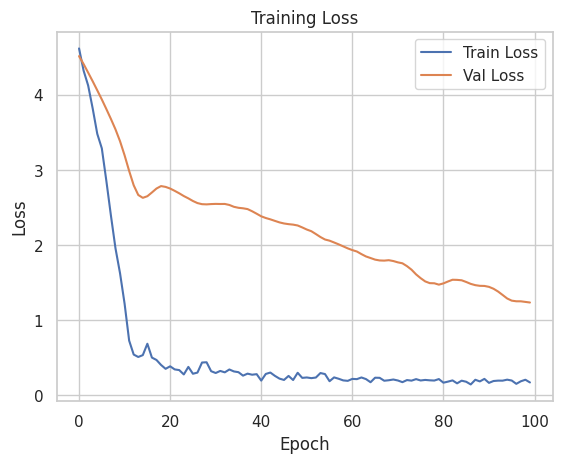

In [ ]:
# Improved Multi-Input Model with EfficientNetB0 Fine-Tuning and Feature Normalization

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

# Paths
IMAGE_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller"
CSV_PATH = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv"

# Load and preprocess CSV
df = pd.read_csv(CSV_PATH)
df.columns = df.columns.str.strip().str.replace(",", ".", regex=False)

emotion_features = [
    'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
]

face_features = [
    'Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise',
    'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft',
    'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold',
    'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight',
    'LookUp', 'aah', 'B,M,P', 'big aah', 'ch,J,sh', 'D,S,T', 'ee', 'eh', 'F,V',
    'i', 'K', 'N', 'oh', 'ooh,Q', 'R', 'th', 'W'
]
face_features = [col for col in face_features if col in df.columns]
df = df.dropna(subset=['ImageFile', 'PainRating'] + emotion_features + face_features)

# Load data
X_img, X_emotion, X_face, y, img_folder_names = [], [], [], [], []
for root, _, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(root, file)
            img_name = file.split("_")[-1]
            label_row = df[df['ImageFile'] == img_name]
            if not label_row.empty:
                try:
                    img = load_img(img_path, target_size=(128, 128))
                    img_array = img_to_array(img) / 255.0
                    emotion_data = label_row[emotion_features].values[0]
                    face_data = label_row[face_features].values[0]
                    pain = label_row['PainRating'].values[0]
                    X_img.append(img_array)
                    X_emotion.append(emotion_data)
                    X_face.append(face_data)
                    y.append(pain)
                    folder_name = os.path.basename(os.path.dirname(img_path))
                    img_folder_names.append(folder_name)
                except Exception as e:
                    print(f"Error processing {file}: {e}")

X_img = np.array(X_img)
X_emotion = np.array(X_emotion)
X_face = np.array(X_face)
y = np.array(y)
img_folder_names = np.array(img_folder_names)

# Normalize emotion and face features
emo_scaler = StandardScaler()
face_scaler = StandardScaler()
X_emotion = emo_scaler.fit_transform(X_emotion)
X_face = face_scaler.fit_transform(X_face)

# Split by folder
all_folders = sorted(set(img_folder_names))
train_folders, temp_folders = train_test_split(all_folders, test_size=0.3, random_state=42)
val_folders, test_folders = train_test_split(temp_folders, test_size=0.5, random_state=42)

def split_by_folder(folders, img_folders, *arrays):
    results = [[] for _ in arrays]
    for i, folder in enumerate(img_folders):
        if folder in folders:
            for res, arr in zip(results, arrays):
                res.append(arr[i])
    return map(np.array, results)

X_img_train, X_emo_train, X_face_train, y_train = split_by_folder(train_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_val, X_emo_val, X_face_val, y_val = split_by_folder(val_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_test, X_emo_test, X_face_test, y_test = split_by_folder(test_folders, img_folder_names, X_img, X_emotion, X_face, y)

# Build model
img_input = Input(shape=(128,128,3), name='ImageInput')
x = preprocess_input(img_input)
base_model = EfficientNetB0(include_top=False, input_tensor=x, pooling='avg', weights='imagenet')
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False
x = base_model.output
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)

emotion_input = Input(shape=(len(emotion_features),), name='EmotionInput')
e = Dense(128, activation='relu')(emotion_input)
e = Dropout(0.2)(e)
e = Dense(64, activation='relu')(e)

face_input = Input(shape=(len(face_features),), name='FaceInput')
f = Dense(128, activation='relu')(face_input)
f = Dropout(0.2)(f)
f = Dense(64, activation='relu')(f)

combined = Concatenate()([x, e, f])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.2)(z)
z = Dense(64, activation='relu')(z)
output = Dense(1, name='PainOutput')(z)

model = Model(inputs=[img_input, emotion_input, face_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss=Huber(), metrics=['mae'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1),
    ModelCheckpoint(filepath='best_pain_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

history = model.fit(
    [X_img_train, X_emo_train, X_face_train], y_train,
    validation_data=([X_img_val, X_emo_val, X_face_val], y_val),
    epochs=100, batch_size=32, callbacks=callbacks, verbose=1
)

# Evaluate
# Evaluate
print("\nEvaluating on test set:")
test_loss, test_mae = model.evaluate([X_img_test, X_emo_test, X_face_test], y_test)
y_pred = model.predict([X_img_test, X_emo_test, X_face_test])
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R¬≤: {r2_score(y_test, y_pred):.4f} | RMSE: {rmse:.4f}")


# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step


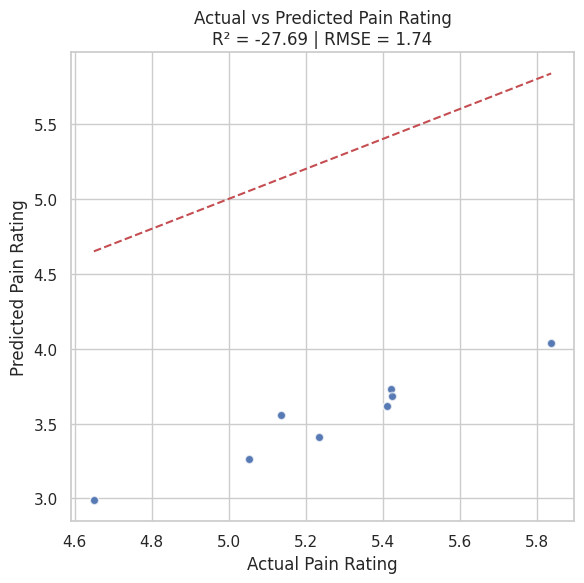

R¬≤ score: -27.6939 | RMSE: 1.7356


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict([X_img_test, X_emo_test, X_face_test])

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Pain Rating")
plt.ylabel("Predicted Pain Rating")
plt.title(f"Actual vs Predicted Pain Rating\nR¬≤ = {r2:.2f} | RMSE = {rmse:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"R¬≤ score: {r2:.4f} | RMSE: {rmse:.4f}")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 7s/step


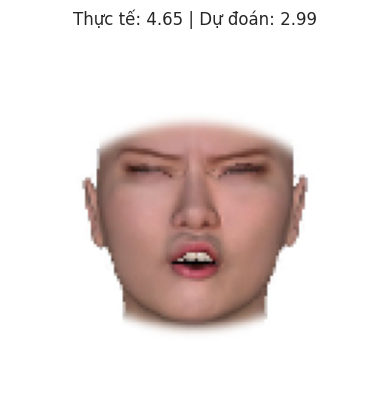

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step


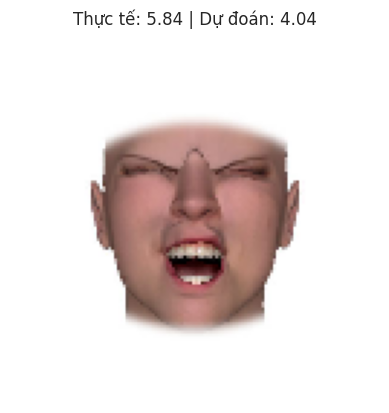

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step


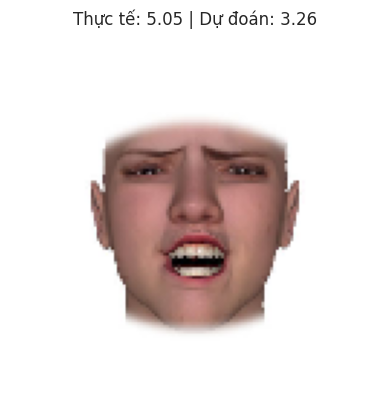

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step


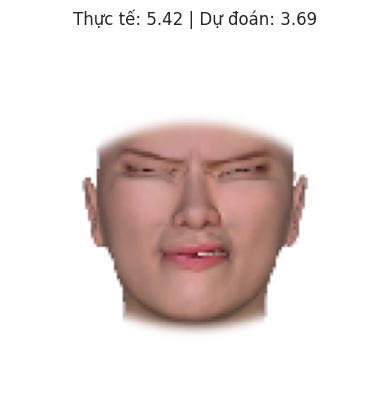

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step


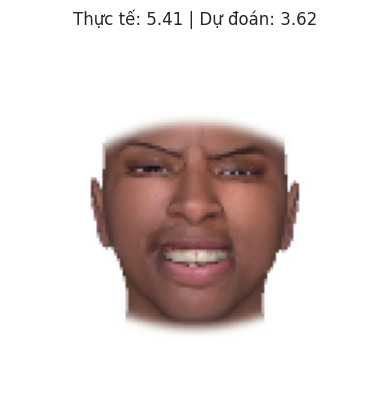

In [ ]:
import random

for _ in range(5):  # test 5 m·∫´u random
    idx = random.randint(0, len(X_img_test) - 1)
    img_sample = np.expand_dims(X_img_test[idx], axis=0)
    emo_sample = np.expand_dims(X_emo_test[idx], axis=0)
    face_sample = np.expand_dims(X_face_test[idx], axis=0)

    pred = model.predict([img_sample, emo_sample, face_sample])[0][0]

    plt.imshow(X_img_test[idx])
    plt.axis('off')
    plt.title(f"Th·ª±c t·∫ø: {y_test[idx]:.2f} | D·ª± ƒëo√°n: {pred:.2f}")
    plt.show()


Chuy·ªÉn merged_output.xlsx sang output.xlsx

In [ ]:
import pandas as pd

# ƒê∆∞·ªùng d·∫´n ƒë·∫øn t·ªáp .xlsx
input_file = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_output.xlsx'  # Thay b·∫±ng ƒë∆∞·ªùng d·∫´n t·ªáp c·ªßa b·∫°n
output_file = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.xlsx'  # T√™n t·ªáp .csv ƒë·∫ßu ra


# ƒê·ªçc t·ªáp .xlsx
df = pd.read_excel(input_file)

df = df.drop(columns=['ResponseId'])

df.head()

# L∆∞u d∆∞·ªõi d·∫°ng .csv
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"ƒê√£ chuy·ªÉn ƒë·ªïi {input_file} sang {output_file}")


ƒê√£ chuy·ªÉn ƒë·ªïi /content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_output.xlsx sang /content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# T√πy ch·ªânh ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu ƒë·ªì ƒë·∫πp h∆°n
sns.set(style="whitegrid")

Mounted at /content/drive


# **output.csv**

# **d√πng tensorflow**

S·ª≠ d·ª•ng face_features: ['Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise', 'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft', 'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold', 'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight', 'LookUp', 'aah', 'big aah', 'ee', 'eh', 'i', 'K', 'N', 'oh', 'R', 'th', 'W']
T·ªïng ·∫£nh h·ª£p l·ªá: 128
Train: 88 | Val: 16 | Test: 24
Epoch 1/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 747ms/step - loss: 4.4777 - mae: 4.9777
Epoch 1: val_loss improved from inf to 2.04431, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 3s/step - loss: 4.3762 - mae: 4.8762 - val_loss: 2.0443 - val_mae: 2.5443 - learning_rate: 0.0010
Epoch 2/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 507ms/step - loss: 1.6358 - mae: 2.1017
Epoch 2: val_loss improved from 2.04431 to 0.44634, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 951ms/step - loss: 1.5448 - mae: 2.0045 - val_loss: 0.4463 - val_mae: 0.9238 - learning_rate: 0.0010
Epoch 3/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 501ms/step - loss: 1.2819 - mae: 1.7129
Epoch 3: val_loss improved from 0.44634 to 0.18149, saving model to best_pain_model.h5


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 944ms/step - loss: 1.3153 - mae: 1.7480 - val_loss: 0.1815 - val_mae: 0.5484 - learning_rate: 0.0010
Epoch 4/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 830ms/step - loss: 0.8950 - mae: 1.3070
Epoch 4: val_loss did not improve from 0.18149
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 1s/step - loss: 0.8788 - mae: 1.2907 - val_loss: 0.4631 - val_mae: 0.9324 - learning_rate: 0.0010
Epoch 5/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 507ms/step - loss: 0.8721 - mae: 1.3158
Epoch 5: val_loss did not improve from 0.18149
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 690ms/step - loss: 0.8739 - mae: 1.3170 - val_loss: 0.8930 - val_mae: 1.3907 - learning_rate: 0.0010
Epoch 6/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 508ms/step - loss: 0.7335 - mae: 1.1519
Epoch 6: val_loss did not improve from 0.1

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 904ms/step - loss: 0.8332 - mae: 1.2591 - val_loss: 0.0292 - val_mae: 0.1764 - learning_rate: 0.0010
Epoch 8/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 734ms/step - loss: 1.0490 - mae: 1.4768
Epoch 8: val_loss did not improve from 0.02920
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 1s/step - loss: 1.0185 - mae: 1.4454 - val_loss: 0.2120 - val_mae: 0.6040 - learning_rate: 0.0010
Epoch 9/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 495ms/step - loss: 0.6123 - mae: 1.0093
Epoch 9: val_loss did not improve from 0.02920
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 676ms/step - loss: 0.6024 - mae: 0.9978 - val_loss: 0.5648 - val_mae: 1.0492 - learning_rate: 0.0010
Epoch 10/100
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 532ms/step - loss: 0.6449 - mae: 1.0544
Epoch 10: val_loss did not improve from 0

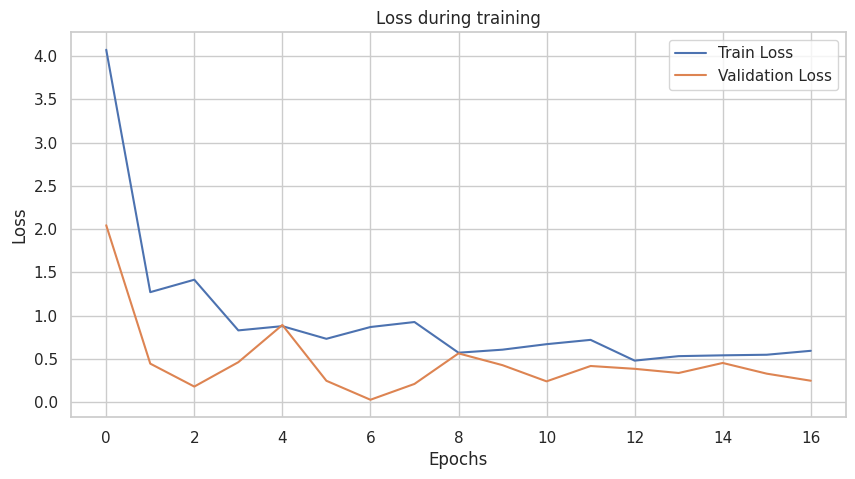

In [ ]:
import os  # Duy·ªát file v√† th∆∞ m·ª•c
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.losses import Huber

# B∆Ø·ªöC 1: ƒê∆Ø·ªúNG D·∫™N
IMAGE_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller"
CSV_PATH = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.csv"

# B∆Ø·ªöC 2: ƒê·ªåC CSV & CHU·∫®N H√ìA
df = pd.read_csv(CSV_PATH)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(",", ".", regex=False)

emotion_features = [
    'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
]

face_features = [
    'Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise',
    'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft',
    'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold',
    'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight',
    'LookUp', 'aah', 'B,M,P', 'big aah', 'ch,J,sh', 'D,S,T', 'ee', 'eh', 'F,V',
    'i', 'K', 'N', 'oh', 'ooh,Q', 'R', 'th', 'W'
]
# L·ªçc c√°c c·ªôt th·ª±c s·ª± t·ªìn t·∫°i
face_features = [col for col in face_features if col in df.columns]
print("S·ª≠ d·ª•ng face_features:", face_features)

df = df.dropna(subset=['ImageFile', 'PainRating'] + emotion_features + face_features)

# B∆Ø·ªöC 3: LOAD D·ªÆ LI·ªÜU
X_img, X_emotion, X_face, y, img_folder_names = [], [], [], [], []
for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(root, file)
            img_name = file
            if "_" in img_name:
                image_file_part = img_name.split("_")[-1]
                label_row = df[df['ImageFile'] == image_file_part]
                if not label_row.empty:
                    try:
                        img = load_img(img_path, target_size=(128, 128))
                        img_array = img_to_array(img) / 255.0
                        emotion_data = label_row[emotion_features].values[0]
                        face_data = label_row[face_features].values[0]
                        pain = label_row['PainRating'].values[0]
                        X_img.append(img_array)
                        X_emotion.append(emotion_data)
                        X_face.append(face_data)
                        y.append(pain)
                        folder_name = os.path.basename(os.path.dirname(img_path))
                        img_folder_names.append(folder_name)
                    except Exception as e:
                        print(f"‚ùå L·ªói x·ª≠ l√Ω ·∫£nh {file}: {e}")

X_img = np.array(X_img)
X_emotion = np.array(X_emotion)
X_face = np.array(X_face)
y = np.array(y)
img_folder_names = np.array(img_folder_names)
print("T·ªïng ·∫£nh h·ª£p l·ªá:", len(X_img))

# B∆Ø·ªöC 4: CHIA D·ªÆ LI·ªÜU (THEO TH∆Ø M·ª§C)
all_folders = sorted(set(img_folder_names))
train_folders, temp_folders = train_test_split(all_folders, test_size=0.3, random_state=42)
val_folders, test_folders = train_test_split(temp_folders, test_size=0.5, random_state=42)

def split_by_folder(folders, img_folders, *arrays):
    results = [[] for _ in arrays]
    for i, folder in enumerate(img_folders):
        if folder in folders:
            for res, arr in zip(results, arrays): res.append(arr[i])
    return map(np.array, results)

X_img_train, X_emo_train, X_face_train, y_train = split_by_folder(train_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_val, X_emo_val, X_face_val, y_val = split_by_folder(val_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_test, X_emo_test, X_face_test, y_test = split_by_folder(test_folders, img_folder_names, X_img, X_emotion, X_face, y)
print("Train:", len(X_img_train), "| Val:", len(X_img_val), "| Test:", len(X_img_test))

# B∆Ø·ªöC 5: X√ÇY D·ª∞NG M√î H√åNH (MULTI-INPUT)
img_input = Input(shape=(128,128,3), name='ImageInput')
x = preprocess_input(img_input)
base_model = EfficientNetB0(include_top=False, input_tensor=x, pooling='avg', weights='imagenet')
base_model.trainable = False
x = base_model.output
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

emotion_input = Input(shape=(len(emotion_features),), name='EmotionInput')
e = Dense(128, activation='relu')(emotion_input)
e = Dropout(0.3)(e)
e = Dense(64, activation='relu')(e)

face_input = Input(shape=(len(face_features),), name='FaceInput')
f = Dense(128, activation='relu')(face_input)
f = Dropout(0.3)(f)
f = Dense(64, activation='relu')(f)

combined = Concatenate()([x, e, f])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.4)(z)
z = Dense(64, activation='relu')(z)
z = Dropout(0.2)(z)
output = Dense(1, name='PainOutput')(z)

model = Model(inputs=[img_input, emotion_input, face_input], outputs=output)
model.compile(optimizer='adam', loss=Huber(delta=1.0), metrics=['mae'])

# B∆Ø·ªöC 6: TRAIN M√î H√åNH
# Kh·ªüi t·∫°o c√°c callback ƒë·ªÉ h·ªó tr·ª£ qu√° tr√¨nh hu·∫•n luy·ªán:
# callbacks = [
#     EarlyStopping(
#         monitor='val_loss',    # Theo d√µi gi√° tr·ªã validation loss
#         patience=10,           # N·∫øu 10 epoch li√™n ti·∫øp kh√¥ng gi·∫£m -> d·ª´ng s·ªõm
#         restore_best_weights=True  # Ph·ª•c h·ªìi l·∫°i tr·ªçng s·ªë t·ªët nh·∫•t
#     ),
#     ReduceLROnPlateau(
#         monitor='val_loss',    # Theo d√µi gi√° tr·ªã validation loss
#         factor=0.5,            # N·∫øu loss kh√¥ng gi·∫£m, gi·∫£m learning rate ƒëi 1/2
#         patience=5,            # Sau 5 epoch kh√¥ng c·∫£i thi·ªán th√¨ gi·∫£m
#         verbose=1              # In ra th√¥ng b√°o khi learning rate thay ƒë·ªïi
#     )
# ]

# ƒê·ªãnh nghƒ©a callbacks m·ªõi: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_pain_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán m√¥ h√¨nh
history = model.fit(
    [X_img_train, X_emo_train, X_face_train], y_train,
    validation_data=([X_img_val, X_emo_val, X_face_val], y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# B∆Ø·ªöC 7: ƒê√ÅNH GI√Å M√î H√åNH
test_loss, test_mae = model.evaluate(
    [X_img_test, X_emo_test, X_face_test], y_test,
    verbose=1
)
print(f"Test Loss: {test_loss:.4f} | Test MAE: {test_mae:.4f}")

# B∆Ø·ªöC 8: V·∫º BI·ªÇU ƒê·ªí LOSS/MAE
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# N·∫øu c·∫ßn v·∫Ω th√™m MAE, b·∫°n c≈©ng c√≥ th·ªÉ th√™m:
# plt.plot(history.history['mae'], label='Train MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')


In [ ]:
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# ƒê∆∞·ªùng d·∫´n model v√† file CSV
model = load_model("best_pain_model.h5")
csv_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.csv"
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(",", ".", regex=False)

# C·∫•u h√¨nh l·∫°i t√™n c·ªôt c·∫ßn thi·∫øt
emotion_features = [
    'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
]

face_features = [
    'Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise',
    'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft',
    'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold',
    'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight',
    'LookUp', 'aah', 'B,M,P', 'big aah', 'ch,J,sh', 'D,S,T', 'ee', 'eh', 'F,V',
    'i', 'K', 'N', 'oh', 'ooh,Q', 'R', 'th', 'W'
]

# # Emotion + face features
# emo = row[emotion_features].iloc[0].values.astype('float32').reshape(1, -1)
# face = row[face_features].iloc[0].values.astype('float32').reshape(1, -1)


# Ch·ªâ ch·ªçn nh·ªØng c·ªôt th·ª±c s·ª± c√≥
face_features = [col for col in face_features if col in df.columns]


# ===============================
# ‚úÖ FUNCTION: D·ª± ƒëo√°n t·ª´ m·ªôt ·∫£nh
# ===============================
def predict_pain(image_path):
    # T√°ch t√™n ·∫£nh
    image_name = image_path.split("/")[-1].split("_")[-1]

    # T√¨m d√≤ng t∆∞∆°ng ·ª©ng trong CSV
    row = df[df['ImageFile'] == image_name]
    if row.empty:
        print("‚ùå Kh√¥ng t√¨m th·∫•y metadata cho ·∫£nh:", image_name)
        return

    # ƒê·ªçc ·∫£nh b·∫±ng OpenCV
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    # Emotion + face features (ch·ªâ l·∫•y d√≤ng ƒë·∫ßu ti√™n n·∫øu c√≥ nhi·ªÅu d√≤ng)
    emo = row[emotion_features].iloc[0].values.astype('float32').reshape(1, -1)
    face = row[face_features].iloc[0].values.astype('float32').reshape(1, -1)

    # üìå In th√¥ng s·ªë bi·ªÉu c·∫£m khu√¥n m·∫∑t
    print("\nüîç Th√¥ng s·ªë ƒë·∫∑c tr∆∞ng khu√¥n m·∫∑t:")
    for f in face_features:
        print(f"  {f:<20}: {row[f].values[0]}")

    # D·ª± ƒëo√°n
    y_pred = model.predict([img, emo, face])
    print(f"\nüì∏ ·∫¢nh: {image_name} ‚Üí D·ª± ƒëo√°n m·ª©c ƒë·ªô ƒëau: {y_pred[0][0]:.3f}")




# ===============================
# üß™ V√≠ d·ª• ch·∫°y
# ===============================
image_path = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller/AF1/AF1_EF5.jpg"
predict_pain(image_path)



üîç Th√¥ng s·ªë ƒë·∫∑c tr∆∞ng khu√¥n m·∫∑t:
  Anger               : 0.84
  Disgust             : 0.87
  Fear                : 0.5125
  Sad                 : 1.0
  SmileClosed         : 0.46
  SmileOpen           : 0.13
  Surprise            : 0.5125
  BlinkLeft           : 0.5125
  BlinkRIght          : 0.5125
  BrowDownLeft        : 0.42
  BrowDownRight       : 0.42
  BrowInLeft          : 0.5125
  BrownInRight        : 0.5125
  BrowUpLeft          : 0.5125
  BrowUpRight         : 0.5125
  EarsOut             : 0.5125
  EpicanthicFold      : 0.5125
  EyeSquintLeft       : 0.38
  EyeSquintRight      : 0.39
  LookDown            : 0.5125
  LookLeft            : 0.5125
  LookRight           : 0.5125
  LookUp              : 0.5125
  aah                 : 1.0
  big aah             : 0.12
  ee                  : 0.5125
  eh                  : 0.5125
  i                   : 0.5125
  K                   : 0.5125
  N                   : 0.5125
  oh                  : 0.12
  R                

In [ ]:
import random

for _ in range(5):  # test 5 m·∫´u random
    idx = random.randint(0, len(X_img_test) - 1)
    img_sample = np.expand_dims(X_img_test[idx], axis=0)
    emo_sample = np.expand_dims(X_emo_test[idx], axis=0)
    face_sample = np.expand_dims(X_face_test[idx], axis=0)

    pred = model.predict([img_sample, emo_sample, face_sample])[0][0]

    plt.imshow(X_img_test[idx])
    plt.axis('off')
    plt.title(f"Th·ª±c t·∫ø: {y_test[idx]:.2f} | D·ª± ƒëo√°n: {pred:.2f}")
    plt.show()


# **Clean DelawarePainDatabase_StimulusCharacterization_forOSF.xlsx**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# T√πy ch·ªânh ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu ƒë·ªì ƒë·∫πp h∆°n
sns.set(style="whitegrid")

file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DelawarePainDatabase_StimulusCharacterization_forOSF.xlsx"
xls = pd.ExcelFile(file_path)

Mounted at /content/drive


In [2]:
import pandas as pd

def clean_DPD_NormingData(df):
    # X√≥a c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt
    df = df.drop(columns=[
        # ƒê·ªãnh danh / h√†nh ch√≠nh
        "Consent", "Race", "Race_Mode", "RaceGenderCode", "RaceMatch", "LaterEditCode",
        "CollectionSiteCode", "NeutralFilter", "NoExpsFilter", "LaterEditFilter", "PostedFilter", "Prompt",

        # Nh√¢n kh·∫©u h·ªçc
        "Gender", "Age_Average", "Male", "Female", "White", "Black", "Hispanic", "EastAsian",
        "SouthAsian", "PacificIslander", "NativeAmerican", "Other",

        # ƒê√°nh gi√° ch·ªß quan (trung t√≠nh)
        "Masculine_Neutral", "Feminine_Neutral", "BabyFaced_Neutral", "Trustworthy_Neutral",
        "Dominant_Neutral", "Attractive_Neutral", "Unusual_Neutral", "Strong_Neutral",
        "HighStatus_Neutral", "LowStatus_Neutral", "Competent_Neutral", "Intelligent_Neutral",

        # ƒê√°nh gi√° c·∫£m x√∫c trung t√≠nh
        "Fearful_Neutral", "Angry_Neutral", "Disgusted_Neutral", "Happy_Neutral", "Sad_Neutral",
        "Surprised_Neutral", "Threatening_Neutral", "PhysicalPain_Neutral", "Neutral_Rating_Count",

        # C·∫£m x√∫c ph·ª• kh√¥ng c·∫ßn thi·∫øt
        "Next_Highest_Expression", "Expession_Highest", "ExpressionType", "Expression_Count",

        # ƒê√°nh gi√° ch·ªß quan kh√¥ng c√≥ gi√° tr·ªã h·ªçc m√°y
        "PainSpecificity", "HowBelievable", "HowPosed", "Race_Prototypicality",

        # D·ªØ li·ªáu k·ªπ thu·∫≠t kh√¥ng c·∫ßn thi·∫øt
        "OpenFace_confidence"
    ], errors='ignore')  # S·ª≠ d·ª•ng 'ignore' ƒë·ªÉ tr√°nh l·ªói n·∫øu m·ªôt s·ªë c·ªôt kh√¥ng c√≥

    return df


In [18]:
df_RawNeutralData_DPD = pd.read_excel(xls, sheet_name="DPD_NormingData")
df_RawNeutralData_DPD = clean_DPD_NormingData(df_RawNeutralData_DPD)

df_RawNeutralData_DPD.columns.tolist()

# print(df_RawNeutralData_DPD["Target"].duplicated().to_string())

df_RawNeutralData_DPD.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DFD_NormingData1.csv", index=False)



/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
# df_NormingData = pd.read_excel(xls, sheet_name="DPD_NormingData")

# df_NormingData.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DFD_NormingData.csv", index=False)

# df_DPD_Codebook = pd.read_excel(xls, sheet_name="DPD_Codebook")
# df_DPD_Codebook.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DFD_Codebook.csv", index=False)

# df_RawNeutralData_DPD = pd.read_excel(xls, sheet_name="RawNeutralData_DPD")
# df_RawNeutralData_DPD.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/RawNeutralData_DPD.csv", index=False)

# df_RawExpressionData_DPD = pd.read_excel(xls, sheet_name="RawExpressionData_DPD")
# df_RawExpressionData_DPD.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/RawExpressionData_DPD.csv", index=False)

# df_RawAUData_Facs_vs_OpenFace = pd.read_excel(xls, sheet_name="RawAUData_Facs_vs_OpenFace")
# df_RawAUData_Facs_vs_OpenFace.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/RawAUData_Facs_vs_OpenFace.csv", index=False)

In [6]:
# M√¥ h√¨nh d·ª± ƒëo√°n m·ª©c ƒë·ªô ƒëau t·ª´ ·∫£nh neutral + expression + AU/bi·ªÉu c·∫£m
import re
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.models import resnet18
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
from PIL import Image
import pandas as pd
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# === C√†i ƒë·∫∑t ===
NEUTRAL_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/Neutral Images/Unedited"
EXPRESSION_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/Expression Images/Unedited"
LABEL_FILE = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DFD_NormingData1.csv"
BATCH_SIZE = 16
IMG_SIZE = 224

# === Ti·ªÅn x·ª≠ l√Ω ===
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# === Dataset ===
# === L·ªöP PainDataset - PHI√äN B·∫¢N D·ªåN D·∫∏P D·ªÆ LI·ªÜU TRI·ªÜT ƒê·ªÇ ===
class PainDataset(Dataset):
    def __init__(self, neutral_dir, expression_dir, label_file, transform=None):
        self.transform = transform

        # 1. Qu√©t v√† t·∫°o b·∫£n ƒë·ªì ƒë∆∞·ªùng d·∫´n
        self.neutral_path_map = {os.path.basename(p).lower(): p for p in self._find_all_images(neutral_dir)}
        self.expression_path_map = {os.path.basename(p).lower(): p for p in self._find_all_images(expression_dir)}

        # 2. ƒê·ªçc file label
        labels_df = pd.read_csv(label_file)

        # --- B∆Ø·ªöC 3: D·ªåN D·∫∏P D·ªÆ LI·ªÜU (QUAN TR·ªåNG) ---
        # Li·ªát k√™ t·∫•t c·∫£ c√°c c·ªôt c·∫ßn ph·∫£i l√† s·ªë
        au_cols = [f"AU{i:02}_OF" for i in [1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 17, 20, 23, 25, 26, 28, 45]]
        numeric_cols = au_cols + ["Pain_Expression", "PhysicalPain_Neutral"]

        for col in numeric_cols:
            if col in labels_df.columns:
                # B∆∞·ªõc 3.1: Thay th·∫ø d·∫•u ph·∫©y b·∫±ng d·∫•u ch·∫•m
                labels_df[col] = labels_df[col].astype(str).str.replace(',', '.')
                # B∆∞·ªõc 3.2: √âp chuy·ªÉn ƒë·ªïi sang d·∫°ng s·ªë. M·ªçi gi√° tr·ªã l·ªói s·∫Ω th√†nh NaN (Not a Number)
                labels_df[col] = pd.to_numeric(labels_df[col], errors='coerce')

        # B∆∞·ªõc 3.3: Thay th·∫ø t·∫•t c·∫£ c√°c gi√° tr·ªã NaN (l·ªói) b·∫±ng s·ªë 0
        labels_df = labels_df.fillna(0)
        # --- K·∫æT TH√öC D·ªåN D·∫∏P D·ªÆ LI·ªÜU ---

        # B√¢y gi·ªù, l·ªçc c√°c h√†ng kh√¥ng c·∫ßn thi·∫øt
        labels_df = labels_df.dropna(subset=["Target"])

        # 4. T·∫°o v√† suy ra t√™n t·ªáp
        labels_df["Expression_File"] = labels_df["Target"].apply(lambda x: str(x).strip() + ".jpg").str.lower()

        def get_neutral_name(expression_filename):
            base_name = re.sub(r'_p\dc$', '', os.path.splitext(expression_filename)[0])
            return base_name + '.jpg'
        labels_df["Neutral_File"] = labels_df["Expression_File"].apply(get_neutral_name)

        # 5. L·ªçc ƒë·ªÉ gi·ªØ l·∫°i nh·ªØng d√≤ng c√≥ c·∫∑p ·∫£nh t·ªìn t·∫°i
        self.labels = labels_df[
            labels_df["Expression_File"].isin(self.expression_path_map.keys()) &
            labels_df["Neutral_File"].isin(self.neutral_path_map.keys())
        ].reset_index(drop=True)

        print(f"ƒê√£ t√¨m th·∫•y {len(self.labels)} c·∫∑p ·∫£nh (Neutral + Expression) h·ª£p l·ªá ƒë·ªÉ ƒë∆∞a v√†o m√¥ h√¨nh.")

    def _find_all_images(self, root_dir):
        # ... (H√†m n√†y gi·ªØ nguy√™n, kh√¥ng thay ƒë·ªïi)
        image_paths = []
        if not os.path.isdir(root_dir):
            print(f"C·∫¢NH B√ÅO: Th∆∞ m·ª•c kh√¥ng t·ªìn t·∫°i: {root_dir}")
            return []
        for dirpath, _, filenames in os.walk(root_dir):
            for filename in filenames:
                if filename.upper().endswith(('.JPG', '.JPEG', '.PNG')):
                    image_paths.append(os.path.join(dirpath, filename))
        return image_paths

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # D·ªÆ LI·ªÜU ƒê√É S·∫†CH, H√ÄM N√ÄY GI·ªú R·∫§T ƒê∆†N GI·∫¢N
        row = self.labels.iloc[idx]

        neutral_filename = row["Neutral_File"]
        expression_filename = row["Expression_File"]

        neutral_path = self.neutral_path_map[neutral_filename]
        expression_path = self.expression_path_map[expression_filename]

        neutral_img = Image.open(neutral_path).convert("RGB")
        expr_img = Image.open(expression_path).convert("RGB")

        if self.transform:
            neutral_img = self.transform(neutral_img)
            expr_img = self.transform(expr_img)

        combined_img = torch.cat([neutral_img, expr_img], dim=0)

        # L·∫•y gi√° tr·ªã tr·ª±c ti·∫øp v√¨ ƒë√£ ƒë∆∞·ª£c d·ªçn d·∫πp
        au_values = [row.get(f"AU{i:02}_OF", 0) for i in [1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 17, 20, 23, 25, 26, 28, 45]]
        aus = torch.tensor(au_values, dtype=torch.float)

        pain_score = torch.tensor(row["Pain_Expression"], dtype=torch.float)

        return combined_img, aus, pain_score

def collate_fn(batch):
    # L·ªçc ra c√°c m·∫´u b·ªã l·ªói (None)
    batch = list(filter(lambda x: x[0] is not None, batch))
    if not batch:
        return torch.Tensor(), torch.Tensor(), torch.Tensor()
    return torch.utils.data.dataloader.default_collate(batch)

# === M√¥ h√¨nh ===
class PainNet(nn.Module):
    def __init__(self):
        super(PainNet, self).__init__()
        base_model = resnet18(pretrained=True)
        base_model.conv1 = nn.Conv2d(6, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])  # Output: (B, 512, 1, 1)

        self.fc = nn.Sequential(
            nn.Linear(512 + 18, 128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, 1)
        )

    def forward(self, x_img, x_au):
        x_feat = self.feature_extractor(x_img).view(x_img.size(0), -1)
        x = torch.cat([x_feat, x_au], dim=1)
        return self.fc(x)

# === Hu·∫•n luy·ªán ===
def train_model():
    # 1. T·∫£i v√† chia to√†n b·ªô d·ªØ li·ªáu
    full_dataset = PainDataset(NEUTRAL_DIR, EXPRESSION_DIR, LABEL_FILE, transform=transform)

    # Chia d·ªØ li·ªáu: 80% cho train, 20% cho validation
    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

    print(f"K√≠ch th∆∞·ªõc t·∫≠p Train: {len(train_dataset)}")
    print(f"K√≠ch th∆∞·ªõc t·∫≠p Validation: {len(val_dataset)}")

    # 2. T·∫°o DataLoader cho t·ª´ng t·∫≠p
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn) # Val kh√¥ng c·∫ßn shuffle

    # 3. Kh·ªüi t·∫°o m√¥ h√¨nh, h√†m loss, v√† optimizer
    model = PainNet()
    # model = model.cuda() if torch.cuda.is_available() else model
    model.to(device)
    criterion = nn.MSELoss()
    # S·ª≠a l·∫°i d√≤ng optimizer c·ªßa b·∫°n
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5) # Th√™m weight_decay
    # Th√™m scheduler ngay sau optimizer
    scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=2, verbose=True)

    best_val_loss = float('inf') # Kh·ªüi t·∫°o val loss t·ªët nh·∫•t ·ªü v√¥ c·ª±c
    epochs_no_improve = 0 # ƒê·∫øm s·ªë epoch kh√¥ng c·∫£i thi·ªán
    n_epochs_stop = 3 # D·ª´ng n·∫øu val loss kh√¥ng c·∫£i thi·ªán trong 3 epoch

    # 4. V√≤ng l·∫∑p hu·∫•n luy·ªán v√† ki·ªÉm ƒë·ªãnh
    for epoch in range(10):
        # --- PHA HU·∫§N LUY·ªÜN ---
        model.train() # Chuy·ªÉn sang ch·∫ø ƒë·ªô train
        running_train_loss = 0.0
        for imgs, aus, scores in train_loader:
            # imgs, aus, scores = imgs.cuda(), aus.cuda(), scores.cuda()
            imgs, aus, scores = imgs.to(device), aus.to(device), scores.to(device) # THAY .cuda() B·∫∞NG .to(device)

            optimizer.zero_grad()
            outputs = model(imgs, aus).squeeze()
            loss = criterion(outputs, scores)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        # --- PHA KI·ªÇM ƒê·ªäNH (VALIDATION) ---
        model.eval() # Chuy·ªÉn sang ch·∫ø ƒë·ªô eval
        running_val_loss = 0.0
        with torch.no_grad(): # Kh√¥ng t√≠nh gradient trong pha validation
            for imgs, aus, scores in val_loader:
                # imgs, aus, scores = imgs.cuda(), aus.cuda(), scores.cuda()
                imgs, aus, scores = imgs.to(device), aus.to(device), scores.to(device) # THAY .cuda() B·∫∞NG .to(device)
                outputs = model(imgs, aus).squeeze()
                loss = criterion(outputs, scores)
                running_val_loss += loss.item()

        # In k·∫øt qu·∫£ c·ªßa epoch
        avg_train_loss = running_train_loss / len(train_loader)
        avg_val_loss = running_val_loss / len(val_loader)
        scheduler.step(avg_val_loss)
        print(f"Epoch {epoch+1}/{10} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

        # --- LOGIC C·ª¶A EARLY STOPPING ---
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model.pth') # L∆∞u l·∫°i m√¥ h√¨nh t·ªët nh·∫•t
            print(f"Validation loss decreased. Saving model to 'best_model.pth'")
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= n_epochs_stop:
                print(f"Early stopping triggered after {n_epochs_stop} epochs with no improvement.")
                break # D·ª´ng v√≤ng l·∫∑p hu·∫•n luy·ªán

    print("Training finished.")

if __name__ == '__main__':
    train_model()


Using device: cpu
ƒê√£ t√¨m th·∫•y 477 c·∫∑p ·∫£nh (Neutral + Expression) h·ª£p l·ªá ƒë·ªÉ ƒë∆∞a v√†o m√¥ h√¨nh.
K√≠ch th∆∞·ªõc t·∫≠p Train: 381
K√≠ch th∆∞·ªõc t·∫≠p Validation: 96


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/10 | Train Loss: 3.8298 | Val Loss: 1.6609
Validation loss decreased. Saving model to 'best_model.pth'
Epoch 2/10 | Train Loss: 0.9994 | Val Loss: 1.1419
Validation loss decreased. Saving model to 'best_model.pth'
Epoch 3/10 | Train Loss: 0.8655 | Val Loss: 1.0728
Validation loss decreased. Saving model to 'best_model.pth'
Epoch 4/10 | Train Loss: 0.7141 | Val Loss: 0.9358
Validation loss decreased. Saving model to 'best_model.pth'
Epoch 5/10 | Train Loss: 0.5563 | Val Loss: 1.0761
Epoch 6/10 | Train Loss: 0.5469 | Val Loss: 0.8839
Validation loss decreased. Saving model to 'best_model.pth'
Epoch 7/10 | Train Loss: 0.6085 | Val Loss: 0.9741
Epoch 8/10 | Train Loss: 0.6224 | Val Loss: 0.9868
Epoch 9/10 | Train Loss: 0.5089 | Val Loss: 0.9946
Early stopping triggered after 3 epochs with no improvement.
Training finished.


In [ ]:
# -*- coding: utf-8 -*-
"""
M√¥ h√¨nh d·ª± ƒëo√°n m·ª©c ƒë·ªô ƒëau - Phi√™n b·∫£n ƒë∆°n gi·∫£n h√≥a,
ch·ªâ d√πng DFD_NormingData.csv cho nh√£n v√† AU.
"""

# === 1. IMPORTS ===
import re
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.models import resnet18
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === 2. C√ÄI ƒê·∫∂T TO√ÄN C·ª§C ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"S·ª≠ d·ª•ng device: {device}")

# --- ƒê∆∞·ªùng d·∫´n ƒë·∫øn c√°c th∆∞ m·ª•c v√† file ---
UNEDITED_NEUTRAL_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/Neutral Images/Unedited"
UNEDITED_EXPRESSION_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/Expression Images/Unedited"
CROPPED_NEUTRAL_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/Neutral Images/Cropped and Standardized"
CROPPED_EXPRESSION_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/Expression Images/Cropped and Standardized"

# Ch·ªâ s·ª≠ d·ª•ng file n√†y cho c·∫£ nh√£n v√† AU
LABELS_AND_AU_PATH = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DFD_NormingData.csv"

# --- C√°c si√™u tham s·ªë ---
BATCH_SIZE = 16
IMG_SIZE = 224
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-5
EPOCHS = 30

# === 3. TI·ªÄN X·ª¨ L√ù ·∫¢NH ===
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# === 4. ƒê·ªäNH NGHƒ®A DATASET ===
class PainDataset(Dataset):
    def __init__(self,
                 unedited_neutral_dir, unedited_expression_dir,
                 cropped_neutral_dir, cropped_expression_dir,
                 labels_and_au_path,
                 transform=None):

        self.transform = transform

        print("--- B·∫ÆT ƒê·∫¶U KH·ªûI T·∫†O PainDataset ---")
        print("ƒêang qu√©t c√°c th∆∞ m·ª•c ·∫£nh...")

        # 1. Qu√©t ·∫£nh v√† t·∫°o b·∫£n ƒë·ªì ƒë∆∞·ªùng d·∫´n
        #    KEY c·ªßa map b√¢y gi·ªù l√† T√äN FILE G·ªêC (kh√¥ng c√≥ ƒëu√¥i), ch·ªØ th∆∞·ªùng
        self.unedited_neutral_map = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in self._find_all_images(unedited_neutral_dir)}
        print(f"T√¨m th·∫•y {len(self.unedited_neutral_map)} ·∫£nh trong Unedited Neutral.")
        self.unedited_expression_map = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in self._find_all_images(unedited_expression_dir)}
        print(f"T√¨m th·∫•y {len(self.unedited_expression_map)} ·∫£nh trong Unedited Expression.")

        self.cropped_neutral_map = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in self._find_all_images(cropped_neutral_dir)}
        print(f"T√¨m th·∫•y {len(self.cropped_neutral_map)} ·∫£nh trong Cropped Neutral.")
        self.cropped_expression_map = {os.path.splitext(os.path.basename(p))[0].lower(): p for p in self._find_all_images(cropped_expression_dir)}
        print(f"T√¨m th·∫•y {len(self.cropped_expression_map)} ·∫£nh trong Cropped Expression.")

        # In ra v√†i key m·∫´u ƒë·ªÉ ki·ªÉm tra
        print("\nDEBUG: V√†i t√™n file m·∫´u t·ª´ self.cropped_neutral_map (keys l√† t√™n g·ªëc, kh√¥ng ƒëu√¥i):")
        if self.cropped_neutral_map: print(list(self.cropped_neutral_map.keys())[:5])
        print("DEBUG: V√†i t√™n file m·∫´u t·ª´ self.cropped_expression_map (keys l√† t√™n g·ªëc, kh√¥ng ƒëu√¥i):")
        if self.cropped_expression_map: print(list(self.cropped_expression_map.keys())[:5])

        print(f"\nƒêang ƒë·ªçc v√† x·ª≠ l√Ω d·ªØ li·ªáu t·ª´ file: {labels_and_au_path}")
        try:
            labels_df = pd.read_csv(labels_and_au_path)
        except FileNotFoundError as e:
            print(f"L·ªñI: Kh√¥ng t√¨m th·∫•y file CSV: {e}"); self.labels = pd.DataFrame(); return

        labels_df.columns = labels_df.columns.str.strip()

        au_indices = [1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 17, 20, 23, 25, 26, 28, 45]
        au_cols_to_clean = [f"AU{i:02d}_OF" for i in au_indices]
        numeric_cols_to_clean = au_cols_to_clean + ["Pain_Expression", "PhysicalPain_Neutral"]

        for col in numeric_cols_to_clean:
            if col in labels_df.columns:
                labels_df[col] = labels_df[col].astype(str).str.replace(',', '.')
                labels_df[col] = pd.to_numeric(labels_df[col], errors='coerce')
        labels_df = labels_df.fillna(0)

        labels_df = labels_df.dropna(subset=["Target"])
        if 'Target' not in labels_df.columns:
             print(f"L·ªñI NGHI√äM TR·ªåNG: C·ªôt 'Target' kh√¥ng t·ªìn t·∫°i trong file {labels_and_au_path}."); self.labels = pd.DataFrame(); return

        print(f"S·ªë l∆∞·ª£ng d√≤ng trong file CSV sau khi ƒë·ªçc v√† l·ªçc 'Target' r·ªóng: {len(labels_df)}")

        # T·∫°o T√äN FILE G·ªêC (kh√¥ng c√≥ ƒëu√¥i) t·ª´ c·ªôt Target
        labels_df["Expression_Base_File"] = labels_df["Target"].apply(lambda x: str(x).strip()).str.lower()
        def get_neutral_base_name(expression_base_filename):
            return re.sub(r'_p\dc$', '', expression_base_filename)
        labels_df["Neutral_Base_File"] = labels_df["Expression_Base_File"].apply(get_neutral_base_name)

        print("\nDEBUG: V√†i t√™n file G·ªêC (kh√¥ng ƒëu√¥i) ƒë∆∞·ª£c suy ra t·ª´ CSV:")
        print(labels_df[['Target', 'Expression_Base_File', 'Neutral_Base_File']].head())

        print("\nƒêang l·ªçc c√°c c·∫∑p ·∫£nh h·ª£p l·ªá...")
        unedited_df = labels_df[
            labels_df["Expression_Base_File"].isin(self.unedited_expression_map.keys()) &
            labels_df["Neutral_Base_File"].isin(self.unedited_neutral_map.keys())
        ].copy()
        unedited_df['image_type'] = 'unedited'
        print(f"T√¨m th·∫•y {len(unedited_df)} c·∫∑p ·∫£nh Unedited h·ª£p l·ªá.")

        cropped_df = labels_df[
            labels_df["Expression_Base_File"].isin(self.cropped_expression_map.keys()) &
            labels_df["Neutral_Base_File"].isin(self.cropped_neutral_map.keys())
        ].copy()
        cropped_df['image_type'] = 'cropped'
        print(f"T√¨m th·∫•y {len(cropped_df)} c·∫∑p ·∫£nh Cropped h·ª£p l·ªá.")

        self.labels = pd.concat([unedited_df, cropped_df], ignore_index=True)
        print(f"\n--- T·∫†O DATASET TH√ÄNH C√îNG ---")
        print(f"T·ªïng s·ªë m·∫´u trong dataset cu·ªëi c√πng (bao g·ªìm c·∫£ 2 b·ªô ·∫£nh): {len(self.labels)}")

    def _find_all_images(self, root_dir):
        image_paths = []
        if not os.path.isdir(root_dir): print(f"C·∫¢NH B√ÅO: Th∆∞ m·ª•c kh√¥ng t·ªìn t·∫°i: {root_dir}"); return []
        for dirpath, _, filenames in os.walk(root_dir):
            for filename in filenames:
                # H√†m n√†y v·∫´n t√¨m t·∫•t c·∫£ c√°c ƒëu√¥i ·∫£nh h·ª£p l·ªá
                if filename.upper().endswith(('.JPG', '.JPEG', '.PNG')):
                    image_paths.append(os.path.join(dirpath, filename))
        return image_paths

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        row = self.labels.iloc[idx]
        image_type = row["image_type"]

        # S·ª≠ d·ª•ng t√™n file G·ªêC (kh√¥ng ƒëu√¥i) ƒë·ªÉ l·∫•y ƒë∆∞·ªùng d·∫´n
        neutral_base_filename = row["Neutral_Base_File"]
        expression_base_filename = row["Expression_Base_File"]

        if image_type == 'unedited':
            neutral_path = self.unedited_neutral_map[neutral_base_filename]
            expression_path = self.unedited_expression_map[expression_base_filename]
        else: # 'cropped'
            neutral_path = self.cropped_neutral_map[neutral_base_filename]
            expression_path = self.cropped_expression_map[expression_base_filename]

        neutral_img, expr_img = Image.open(neutral_path).convert("RGB"), Image.open(expression_path).convert("RGB")
        if self.transform:
            neutral_img, expr_img = self.transform(neutral_img), self.transform(expr_img)

        combined_img = torch.cat([neutral_img, expr_img], dim=0)
        au_values = [row.get(f"AU{i:02d}_OF", 0) for i in [1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 17, 20, 23, 25, 26, 28, 45]]
        aus = torch.tensor(au_values, dtype=torch.float)
        pain_score = torch.tensor(row["Pain_Expression"], dtype=torch.float)
        return combined_img, aus, pain_score

# === 5. ƒê·ªäNH NGHƒ®A C√ÅC H√ÄM TI·ªÜN √çCH V√Ä M√î H√åNH ===
def collate_fn(batch):
    batch = list(filter(lambda x: x is not None and x[0] is not None, batch))
    if not batch: return torch.Tensor(), torch.Tensor(), torch.Tensor()
    return torch.utils.data.dataloader.default_collate(batch)

class PainNet(nn.Module):
    def __init__(self):
        super(PainNet, self).__init__()
        base_model = resnet18(pretrained=True)
        base_model.conv1 = nn.Conv2d(6, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
        self.fc = nn.Sequential(
            nn.Linear(512 + 18, 128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, 1)
        )
    def forward(self, x_img, x_au):
        x_feat = self.feature_extractor(x_img).view(x_img.size(0), -1)
        x = torch.cat([x_feat, x_au], dim=1)
        return self.fc(x)

# === 6. H√ÄM HU·∫§N LUY·ªÜN ===
def train_model():
    print("\n--- B·∫ÆT ƒê·∫¶U QU√Å TR√åNH HU·∫§N LUY·ªÜN ---")
    torch.manual_seed(42)

    full_dataset = PainDataset(
        unedited_neutral_dir=UNEDITED_NEUTRAL_DIR, unedited_expression_dir=UNEDITED_EXPRESSION_DIR,
        cropped_neutral_dir=CROPPED_NEUTRAL_DIR, cropped_expression_dir=CROPPED_EXPRESSION_DIR,
        labels_and_au_path=LABELS_AND_AU_PATH, # Ch·ªâ c√≤n 1 file CSV
        transform=transform
    )
    if len(full_dataset) == 0:
        print("L·ªñI: Dataset r·ªóng sau khi x·ª≠ l√Ω. K·∫øt th√∫c hu·∫•n luy·ªán.")
        return

    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    if train_size == 0 or val_size == 0:
        print(f"L·ªñI: Kh√¥ng ƒë·ªß d·ªØ li·ªáu ƒë·ªÉ chia train/val. Train: {train_size}, Val: {val_size}")
        return

    train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

    print(f"K√≠ch th∆∞·ªõc t·∫≠p Train: {len(train_dataset)}, K√≠ch th∆∞·ªõc t·∫≠p Validation: {len(val_dataset)}")

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

    model = PainNet().to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.2, patience=3, verbose=True)

    best_val_loss = float('inf')
    epochs_no_improve = 0
    n_epochs_stop = 5

    for epoch in range(EPOCHS):
        model.train()
        running_train_loss = 0.0
        if len(train_loader) == 0: print("C·∫¢NH B√ÅO: train_loader r·ªóng!"); break
        for imgs, aus, scores in train_loader:
            if imgs.nelement() == 0: continue
            imgs, aus, scores = imgs.to(device), aus.to(device), scores.to(device)
            optimizer.zero_grad()
            outputs = model(imgs, aus).squeeze()
            loss = criterion(outputs, scores)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        model.eval()
        running_val_loss = 0.0
        if len(val_loader) == 0: print("C·∫¢NH B√ÅO: val_loader r·ªóng!"); break
        with torch.no_grad():
            for imgs, aus, scores in val_loader:
                if imgs.nelement() == 0: continue
                imgs, aus, scores = imgs.to(device), aus.to(device), scores.to(device)
                outputs = model(imgs, aus).squeeze()
                loss = criterion(outputs, scores)
                running_val_loss += loss.item()

        avg_train_loss = running_train_loss / len(train_loader) if len(train_loader) > 0 else 0
        avg_val_loss = running_val_loss / len(val_loader) if len(val_loader) > 0 else float('inf')

        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch+1:02d}/{EPOCHS} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | LR: {current_lr:.1e}")

        scheduler.step(avg_val_loss)

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f"   -> Val loss decreased ({best_val_loss:.4f}). Saving model to 'best_model.pth'")
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            print(f"   -> Val loss did not improve for {epochs_no_improve} epoch(s). Best: {best_val_loss:.4f}")
            if epochs_no_improve >= n_epochs_stop:
                print(f"   -> Early stopping triggered after {n_epochs_stop} epochs with no improvement.")
                break

    print("--- HU·∫§N LUY·ªÜN K·∫æT TH√öC ---")

# === 7. H√ÄM ƒê√ÅNH GI√Å ===
def evaluate_model():
    print("\n--- B·∫ÆT ƒê·∫¶U ƒê√ÅNH GI√Å M√î H√åNH T·ªêT NH·∫§T ---")
    torch.manual_seed(42)
    full_dataset = PainDataset(
        unedited_neutral_dir=UNEDITED_NEUTRAL_DIR, unedited_expression_dir=UNEDITED_EXPRESSION_DIR,
        cropped_neutral_dir=CROPPED_NEUTRAL_DIR, cropped_expression_dir=CROPPED_EXPRESSION_DIR,
        labels_and_au_path=LABELS_AND_AU_PATH, # Ch·ªâ c√≤n 1 file CSV
        transform=transform
    )
    if len(full_dataset) == 0: print("L·ªñI: Dataset r·ªóng. Kh√¥ng th·ªÉ ƒë√°nh gi√°."); return

    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    if train_size == 0 or val_size == 0:
        print(f"L·ªñI: Kh√¥ng ƒë·ªß d·ªØ li·ªáu ƒë·ªÉ chia train/val cho ƒë√°nh gi√°. Train: {train_size}, Val: {val_size}")
        return

    _, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

    model = PainNet().to(device)
    try:
        model.load_state_dict(torch.load('best_model.pth', map_location=device))
        print("ƒê√£ t·∫£i th√†nh c√¥ng m√¥ h√¨nh t·ª´ 'best_model.pth'.")
    except FileNotFoundError:
        print("L·ªñI: Kh√¥ng t√¨m th·∫•y file 'best_model.pth'. Kh√¥ng th·ªÉ ƒë√°nh gi√°.")
        return
    model.eval()

    all_labels, all_predictions = [], []
    if len(val_loader) == 0: print("C·∫¢NH B√ÅO: val_loader r·ªóng trong h√†m ƒë√°nh gi√°!"); return

    with torch.no_grad():
        for imgs, aus, scores in val_loader:
            if imgs.nelement() == 0: continue
            imgs, aus, scores = imgs.to(device), aus.to(device), scores.to(device)
            outputs = model(imgs, aus).squeeze()
            all_labels.extend(scores.cpu().numpy())
            all_predictions.extend(outputs.cpu().numpy())

    if not all_labels or not all_predictions:
        print("L·ªñI: Kh√¥ng c√≥ d·ªØ li·ªáu ƒë·ªÉ t√≠nh to√°n ch·ªâ s·ªë sau khi duy·ªát val_loader.")
        return

    mse, mae, r2 = mean_squared_error(all_labels, all_predictions), mean_absolute_error(all_labels, all_predictions), r2_score(all_labels, all_predictions)
    print("\n--- C√ÅC CH·ªà S·ªê ƒê√ÅNH GI√Å ---")
    print(f"  - R-squared (R¬≤): {r2:.4f}")
    print(f"  - RMSE: {np.sqrt(mse):.4f}")
    print(f"  - MAE: {mae:.4f}")

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(9, 9))
    plt.scatter(all_labels, all_predictions, alpha=0.6, edgecolors='k', s=50, label='D·ªØ li·ªáu d·ª± ƒëo√°n')

    if all_labels and all_predictions:
        plot_lims_min = min(min(all_labels), min(all_predictions))
        plot_lims_max = max(max(all_labels), max(all_predictions))
        plot_lims = [plot_lims_min, plot_lims_max]
        plt.plot(plot_lims, plot_lims, 'r--', alpha=0.8, lw=2, label='D·ª± ƒëo√°n ho√†n h·∫£o (y=x)')

    plt.xlabel("Gi√° tr·ªã th·ª±c t·∫ø", fontsize=13)
    plt.ylabel("Gi√° tr·ªã d·ª± ƒëo√°n", fontsize=13)
    plt.title("So s√°nh gi√° tr·ªã th·ª±c t·∫ø v√† gi√° tr·ªã d·ª± ƒëo√°n", fontsize=15, pad=15)
    plt.legend(fontsize=11)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# === 8. CH·∫†Y CH∆Ø∆†NG TR√åNH ===
if __name__ == '__main__':
    train_model()
    evaluate_model()

S·ª≠ d·ª•ng device: cpu

--- B·∫ÆT ƒê·∫¶U QU√Å TR√åNH HU·∫§N LUY·ªÜN ---
--- B·∫ÆT ƒê·∫¶U KH·ªûI T·∫†O PainDataset ---
ƒêang qu√©t c√°c th∆∞ m·ª•c ·∫£nh...
T√¨m th·∫•y 219 ·∫£nh trong Unedited Neutral.
T√¨m th·∫•y 584 ·∫£nh trong Unedited Expression.
T√¨m th·∫•y 244 ·∫£nh trong Cropped Neutral.
T√¨m th·∫•y 652 ·∫£nh trong Cropped Expression.

DEBUG: V√†i t√™n file m·∫´u t·ª´ self.cropped_neutral_map (keys l√† t√™n g·ªëc, kh√¥ng ƒëu√¥i):
['dpd_1_wm1', 'dpd_1_wm19', 'dpd_1_wm29', 'dpd_1_wm1alt', 'dpd_1_wm21']
DEBUG: V√†i t√™n file m·∫´u t·ª´ self.cropped_expression_map (keys l√† t√™n g·ªëc, kh√¥ng ƒëu√¥i):
['dpd_1_wm3_p4', 'dpd_1_wm5_p1', 'dpd_1_wm1_p1', 'dpd_1_wm2_p4', 'dpd_1_wm5_p3']

ƒêang ƒë·ªçc v√† x·ª≠ l√Ω d·ªØ li·ªáu t·ª´ file: /content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DFD_NormingData.csv
S·ªë l∆∞·ª£ng d√≤ng trong file CSV sau khi ƒë·ªçc v√† l·ªçc 'Target' r·ªóng: 730

DEBUG: V√†i t√™n file G·ªêC (kh√¥ng ƒëu√¥i) ƒë∆∞·ª£c suy ra t·ª´ CSV:
                   Targ

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will

Epoch 01/30 | Train Loss: 3.6023 | Val Loss: 0.9344 | LR: 1.0e-04
   -> Val loss decreased (0.9344). Saving model to 'best_model.pth'
Epoch 02/30 | Train Loss: 1.3006 | Val Loss: 0.8432 | LR: 1.0e-04
   -> Val loss decreased (0.8432). Saving model to 'best_model.pth'
Epoch 03/30 | Train Loss: 0.8250 | Val Loss: 0.8920 | LR: 1.0e-04
   -> Val loss did not improve for 1 epoch(s). Best: 0.8432


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/RawAUData_Facs_vs_OpenFace.csv")
df.head()


--- B·∫ÆT ƒê·∫¶U ƒê√ÅNH GI√Å M√î H√åNH ---
S·ª≠ d·ª•ng device ƒë·ªÉ ƒë√°nh gi√°: cpu
ƒê√£ t√¨m th·∫•y 477 c·∫∑p ·∫£nh (Neutral + Expression) h·ª£p l·ªá ƒë·ªÉ ƒë∆∞a v√†o m√¥ h√¨nh.
ƒê√£ t·∫£i l·∫°i t·∫≠p validation v·ªõi 96 m·∫´u.


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ƒê√£ t·∫£i th√†nh c√¥ng m√¥ h√¨nh t·ª´ 'best_model.pth'.

--- C√ÅC CH·ªà S·ªê ƒê√ÅNH GI√Å ---
Mean Squared Error (MSE):      0.3670
Root Mean Squared Error (RMSE):0.6058
Mean Absolute Error (MAE):     0.4255
R-squared (R¬≤):                0.6345


<ipython-input-7-fd60edae8b37>:93: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-7-fd60edae8b37>:93: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-7-fd60edae8b37>:93: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-7-fd60edae8b37>:93: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-7-fd60edae8b37>:93: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-7-fd60edae8b37>:93: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.

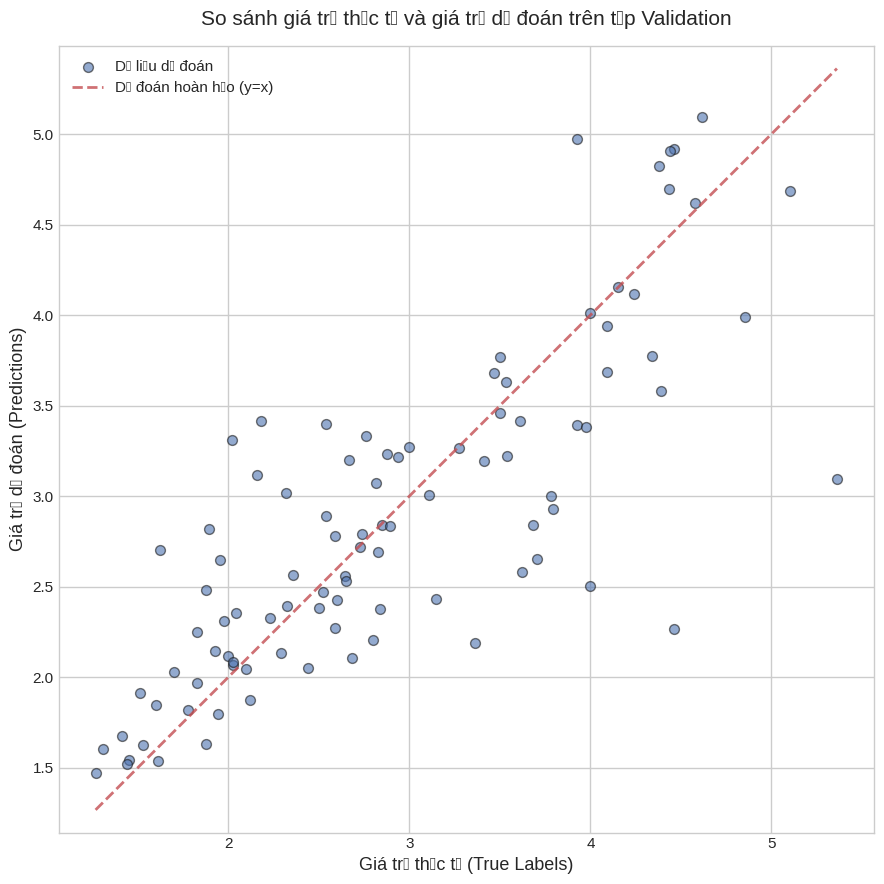

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import torch
from torch.utils.data import DataLoader

# --- H√ÄM ƒê√ÅNH GI√Å M√î H√åNH ---

def evaluate_model():
    """
    T·∫£i m√¥ h√¨nh t·ªët nh·∫•t ƒë√£ l∆∞u, ch·∫°y ƒë√°nh gi√° tr√™n t·∫≠p validation,
    t√≠nh to√°n c√°c ch·ªâ s·ªë v√† v·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£.
    """
    print("\n--- B·∫ÆT ƒê·∫¶U ƒê√ÅNH GI√Å M√î H√åNH ---")

    # T·ª± ƒë·ªông ch·ªçn device (CPU ho·∫∑c GPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"S·ª≠ d·ª•ng device ƒë·ªÉ ƒë√°nh gi√°: {device}")

    # --- 1. T·∫¢I L·∫†I T·∫¨P D·ªÆ LI·ªÜU VALIDATION ---
    # ƒê·∫∑t seed ƒë·ªÉ ƒë·∫£m b·∫£o vi·ªác chia train/val gi·ªëng h·ªát nh∆∞ l√∫c hu·∫•n luy·ªán
    # R·∫•t quan tr·ªçng ƒë·ªÉ c√≥ k·∫øt qu·∫£ ƒë√°nh gi√° ch√≠nh x√°c
    torch.manual_seed(42)

    # T·∫£i l·∫°i to√†n b·ªô dataset
    # Gi·∫£ ƒë·ªãnh c√°c bi·∫øn NEUTRAL_DIR, EXPRESSION_DIR, LABEL_FILE, transform ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a ·ªü c√°c √¥ tr∆∞·ªõc
    full_dataset = PainDataset(NEUTRAL_DIR, EXPRESSION_DIR, LABEL_FILE, transform=transform)

    # Chia l·∫°i y h·ªát nh∆∞ c≈© ƒë·ªÉ l·∫•y ƒë√∫ng t·∫≠p validation
    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    _, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
    print(f"ƒê√£ t·∫£i l·∫°i t·∫≠p validation v·ªõi {len(val_dataset)} m·∫´u.")

    # --- 2. T·∫¢I M√î H√åNH ƒê√É L∆ØU ---
    # Kh·ªüi t·∫°o l·∫°i ki·∫øn tr√∫c m√¥ h√¨nh (gi·∫£ ƒë·ªãnh l·ªõp PainNet ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a ·ªü √¥ tr∆∞·ªõc)
    model = PainNet()

    # T·∫£i tr·ªçng s·ªë t·ª´ file best_model.pth
    # map_location=device ƒë·∫£m b·∫£o code ch·∫°y ƒë∆∞·ª£c tr√™n c·∫£ CPU v√† GPU
    try:
        model.load_state_dict(torch.load('best_model.pth', map_location=device))
    except FileNotFoundError:
        print("L·ªñI: Kh√¥ng t√¨m th·∫•y file 'best_model.pth'. Vui l√≤ng ch·∫°y √¥ hu·∫•n luy·ªán tr∆∞·ªõc.")
        return

    model.to(device)
    model.eval() # Chuy·ªÉn m√¥ h√¨nh sang ch·∫ø ƒë·ªô ƒë√°nh gi√°
    print("ƒê√£ t·∫£i th√†nh c√¥ng m√¥ h√¨nh t·ª´ 'best_model.pth'.")

    # --- 3. L·∫§Y D·ª∞ ƒêO√ÅN T·ª™ M√î H√åNH ---
    all_labels = []
    all_predictions = []

    with torch.no_grad(): # T·∫Øt vi·ªác t√≠nh gradient
        for imgs, aus, scores in val_loader:
            imgs, aus, scores = imgs.to(device), aus.to(device), scores.to(device)

            outputs = model(imgs, aus).squeeze()

            # Chuy·ªÉn d·ªØ li·ªáu v·ªÅ CPU v√† g·ªôp v√†o danh s√°ch
            all_labels.extend(scores.cpu().numpy())
            all_predictions.extend(outputs.cpu().numpy())

    # --- 4. T√çNH TO√ÅN C√ÅC CH·ªà S·ªê ---
    mse = mean_squared_error(all_labels, all_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(all_labels, all_predictions)
    r2 = r2_score(all_labels, all_predictions)

    print("\n--- C√ÅC CH·ªà S·ªê ƒê√ÅNH GI√Å ---")
    print(f"Mean Squared Error (MSE):      {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE):{rmse:.4f}")
    print(f"Mean Absolute Error (MAE):     {mae:.4f}")
    print(f"R-squared (R¬≤):                {r2:.4f}")

    # --- 5. V·∫º BI·ªÇU ƒê·ªí ---
    plt.style.use('seaborn-v0_8-whitegrid') # D√πng style cho bi·ªÉu ƒë·ªì ƒë·∫πp h∆°n
    plt.figure(figsize=(9, 9))
    plt.scatter(all_labels, all_predictions, alpha=0.6, edgecolors='k', s=50, label='D·ªØ li·ªáu d·ª± ƒëo√°n')

    # V·∫Ω ƒë∆∞·ªùng y=x (ƒë∆∞·ªùng d·ª± ƒëo√°n ho√†n h·∫£o)
    lims = [min(min(all_labels), min(all_predictions)), max(max(all_labels), max(all_predictions))]
    plt.plot(lims, lims, 'r--', alpha=0.8, lw=2, label='D·ª± ƒëo√°n ho√†n h·∫£o (y=x)')

    plt.xlabel("Gi√° tr·ªã th·ª±c t·∫ø (True Labels)", fontsize=13)
    plt.ylabel("Gi√° tr·ªã d·ª± ƒëo√°n (Predictions)", fontsize=13)
    plt.title("So s√°nh gi√° tr·ªã th·ª±c t·∫ø v√† gi√° tr·ªã d·ª± ƒëo√°n tr√™n t·∫≠p Validation", fontsize=15, pad=15)
    plt.legend(fontsize=11)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


# --- G·ªåI H√ÄM ƒê·ªÇ B·∫ÆT ƒê·∫¶U ƒê√ÅNH GI√Å ---
evaluate_model()